<a href="https://colab.research.google.com/github/bineee39/first-repository/blob/master/MainQuest1108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [2]:
train_df.shape

(170883, 32)

In [4]:
test_df.shape

(113923, 31)

In [5]:
train_df.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [6]:
train_df['id'].nunique()

170883

<Axes: xlabel='id', ylabel='Time'>

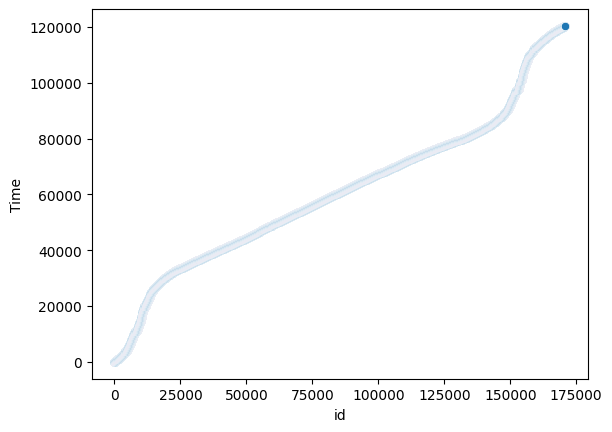

In [9]:
sns.scatterplot(train_df,x=train_df['id'],y=train_df['Time'])

id에따라 time이 증가한다. id를 부여할때 time을 오름차순으로 두고 부여한것으로 보인다.

<Axes: xlabel='Time', ylabel='Amount'>

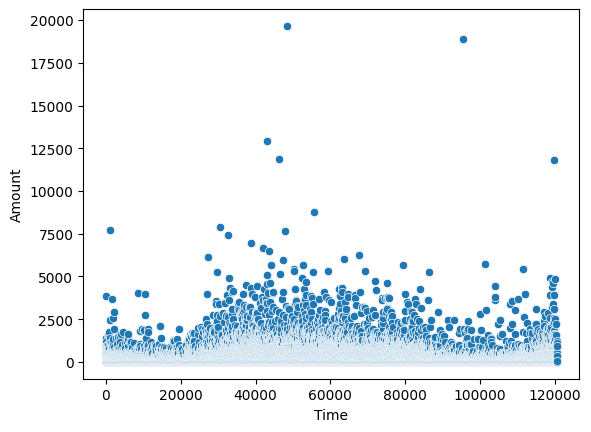

In [10]:
sns.scatterplot(train_df,x=train_df['Time'],y=train_df['Amount'])

In [ ]:
이상치가 사기거래를 탐지하는 역할을 할 수도 있으므로 이상치를 제거하기보단 스케일링만 진행했습니다.

<Axes: xlabel='Class', ylabel='count'>

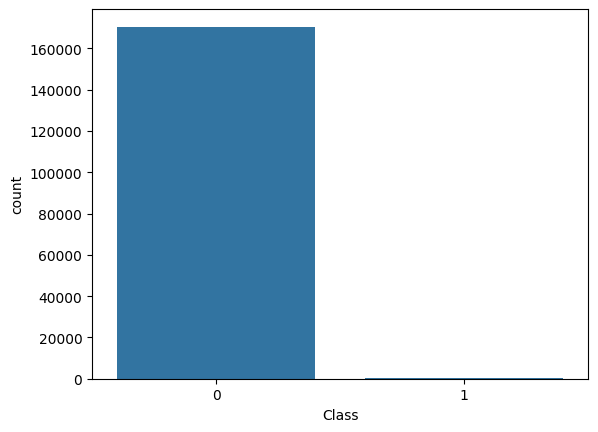

In [13]:
sns.countplot(x='Class', data=train_df)

In [14]:
train_df['Class'].value_counts()

,count
Class,
0,170523
1,360


In [15]:
train_df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.997893
1,0.002107


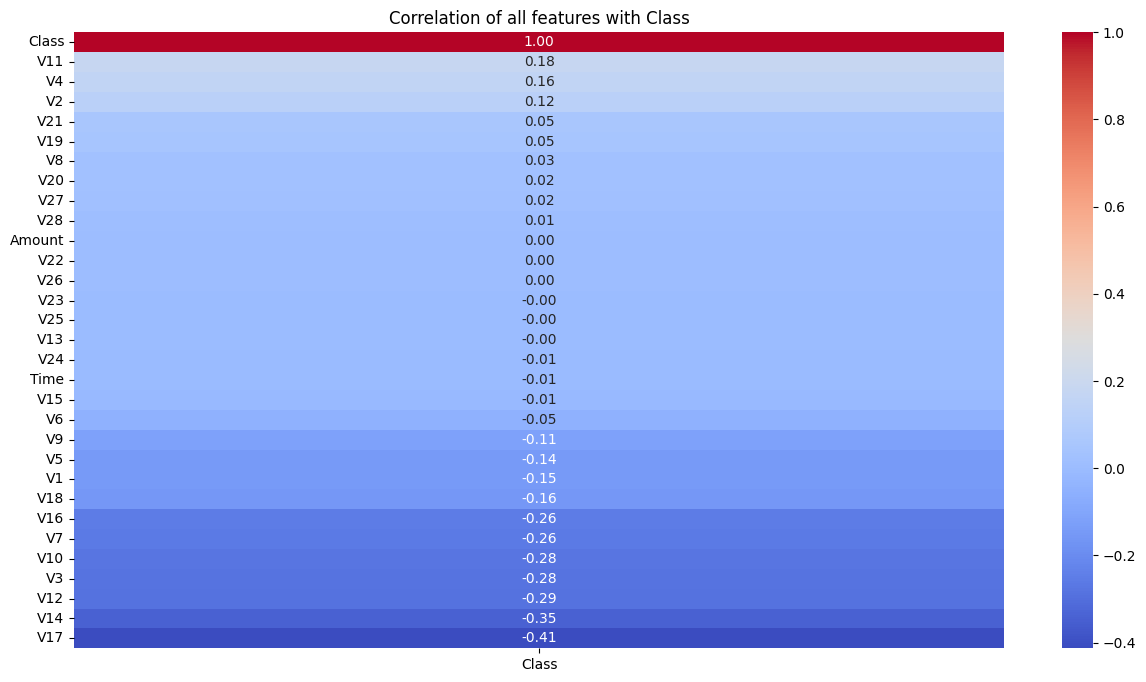

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_df.drop('id', axis=1).corr()

corr_with_class = corr_matrix[['Class']]

plt.figure(figsize=(15, 8))
sns.heatmap(corr_with_class.sort_values(by='Class', ascending=False),
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.title('Correlation of all features with Class')
plt.show()

이미 pca를 거친 변수들이므로 상관계수가 낮게나온다

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
cols_to_scale = ['Time', 'Amount']

train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

test_df[cols_to_scale] = scaler.transform(test_df[cols_to_scale])

train_df[cols_to_scale].describe()

,Time,Amount
count,170883.000000,170883.000000
mean,0.008436,0.918679
std,0.743958,3.452477
min,-1.624788,-0.307271
25%,-0.522904,-0.230348
50%,0.000000,0.000000
75%,0.477096,0.769652
max,1.593883,275.612577


In [18]:
train_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.624788,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.792953,0
1,1,-1.624788,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269512,0
2,2,-1.624761,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.008001,0
3,3,-1.624761,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.426305,0
4,4,-1.624734,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.675182,0


In [12]:
train_df.drop('id',axis=1,inplace=True)

In [13]:
test_df.drop('id',axis=1,inplace=True)

In [21]:
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.593883,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,-2.277774,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,1.447080
1,1.593883,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,0.529802,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,0.394582
2,1.593883,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,-0.648266,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,-0.185289
3,1.593883,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,-0.041604,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,0.534812
4,1.593883,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,-0.634128,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,1.376755


In [14]:
X = train_df.drop('Class', axis=1)
y = train_df['Class']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (170883, 30)
y shape: (170883,)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False,
    random_state=42
)

print(f"원본 y_train 클래스 분포:\n{y_train.value_counts()}")
#오버샘플링으로 불균형 Class맞추어줌
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"SMOTE 적용 후 y_train 클래스 분포:\n{y_train_smote.value_counts()}")

models = {
    "Logistic Regression (Lasso)": LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"[{name}] 검증 데이터 F1 Score: {f1:.4f}")

    print("\n[Classification Report]")
    print(classification_report(y_val, y_pred, target_names=['Normal (0)', 'Fraud (1)']))

final_results_df = pd.DataFrame(results).set_index('Model')

print("최종 성능 지표")
print(final_results_df.sort_values(by='F1 Score', ascending=False))

원본 y_train 클래스 분포:
Class
0    136443
1       263
Name: count, dtype: int64
SMOTE 적용 후 y_train 클래스 분포:
Class
0    136443
1    136443
Name: count, dtype: int64
[Logistic Regression (Lasso)] 검증 데이터 F1 Score: 0.0812

[Classification Report]
              precision    recall  f1-score   support

  Normal (0)       1.00      0.94      0.97     34080
   Fraud (1)       0.04      0.93      0.08        97

    accuracy                           0.94     34177
   macro avg       0.52      0.93      0.53     34177
weighted avg       1.00      0.94      0.97     34177

[LightGBM] 검증 데이터 F1 Score: 0.7111

[Classification Report]
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00     34080
   Fraud (1)       0.62      0.82      0.71        97

    accuracy                           1.00     34177
   macro avg       0.81      0.91      0.86     34177
weighted avg       1.00      1.00      1.00     34177

[XGBoost] 검증 데이터 F1 Score: 0.7902

[Classificatio

하이퍼파라미터 최적화를 거치지 않은 상태에서는 XGBoost가 가장 F1score가 높았다

In [9]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.1 MB/s eta 0:00:00


# 로지스틱 하이퍼파라미터(C) 최적화

In [27]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
def objective_lr(trial):

    c_param = trial.suggest_loguniform('C', 1e-4, 100)

    model = LogisticRegression(
        penalty='l1',
        C=c_param,
        solver='liblinear',
        random_state=42
    )

    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)

    return f1_score(y_val, y_pred)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=50, show_progress_bar=True)

print("\n[로지스틱 회귀] 최적 F1 Score:", study_lr.best_value)
print("[로지스틱 회귀] 최적 하이퍼파라미터:", study_lr.best_params)

best_lr_params = study_lr.best_params
best_lr_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, **best_lr_params)
best_lr_model.fit(X_train_smote, y_train_smote)

[I 2025-11-07 04:09:29,706] A new study created in memory with name: no-name-226e6acd-bfa7-4e7e-91ac-7b8c79770af8


  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:09:46,204] Trial 0 finished with value: 0.07787762088147197 and parameters: {'C': 0.048018973570364394}. Best is trial 0 with value: 0.07787762088147197.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:10:01,613] Trial 1 finished with value: 0.08032128514056225 and parameters: {'C': 0.21182964729841214}. Best is trial 1 with value: 0.08032128514056225.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:10:12,555] Trial 2 finished with value: 0.07861771058315335 and parameters: {'C': 0.06573151081512854}. Best is trial 1 with value: 0.08032128514056225.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:10:27,356] Trial 3 finished with value: 0.08111762054979721 and parameters: {'C': 0.7870970167721527}. Best is trial 3 with value: 0.08111762054979721.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:10:49,895] Trial 4 finished with value: 0.08155867693701857 and parameters: {'C': 0.07180544928792462}. Best is trial 4 with value: 0.08155867693701857.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:11:03,203] Trial 5 finished with value: 0.08003557136505113 and parameters: {'C': 0.16066602834124996}. Best is trial 4 with value: 0.08155867693701857.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:11:05,655] Trial 6 finished with value: 0.10244988864142539 and parameters: {'C': 0.0020174830738948946}. Best is trial 6 with value: 0.10244988864142539.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:11:22,586] Trial 7 finished with value: 0.08093525179856115 and parameters: {'C': 3.1733106387546406}. Best is trial 6 with value: 0.10244988864142539.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:11:38,051] Trial 8 finished with value: 0.08097165991902834 and parameters: {'C': 22.52653844703597}. Best is trial 6 with value: 0.10244988864142539.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:05,970] Trial 9 finished with value: 0.08438818565400844 and parameters: {'C': 0.3176267007005329}. Best is trial 6 with value: 0.10244988864142539.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:07,525] Trial 10 finished with value: 0.17794970986460348 and parameters: {'C': 0.0005245030295521661}. Best is trial 10 with value: 0.17794970986460348.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:08,930] Trial 11 finished with value: 0.18652849740932642 and parameters: {'C': 0.00034531408051880565}. Best is trial 11 with value: 0.18652849740932642.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:09,980] Trial 12 finished with value: 0.20412844036697247 and parameters: {'C': 0.00013209387972090938}. Best is trial 12 with value: 0.20412844036697247.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:11,030] Trial 13 finished with value: 0.2025028441410694 and parameters: {'C': 0.000102209146626387}. Best is trial 12 with value: 0.20412844036697247.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:12,222] Trial 14 finished with value: 0.20625724217844726 and parameters: {'C': 0.00012059385049264681}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:15,385] Trial 15 finished with value: 0.07537894305612454 and parameters: {'C': 0.005462893370672696}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:18,410] Trial 16 finished with value: 0.07744107744107744 and parameters: {'C': 0.004526499752943071}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:20,340] Trial 17 finished with value: 0.20202020202020202 and parameters: {'C': 0.0001850542432215054}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:22,286] Trial 18 finished with value: 0.1309608540925267 and parameters: {'C': 0.0011932700385641091}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:26,693] Trial 19 finished with value: 0.0745240988254354 and parameters: {'C': 0.012278223479459147}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:28,386] Trial 20 finished with value: 0.17726396917148363 and parameters: {'C': 0.0005398563167167462}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:29,533] Trial 21 finished with value: 0.2018140589569161 and parameters: {'C': 0.00010093876082310789}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:30,629] Trial 22 finished with value: 0.20578034682080926 and parameters: {'C': 0.0001236090075992886}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:32,862] Trial 23 finished with value: 0.12057667103538663 and parameters: {'C': 0.00149277218637309}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:38,671] Trial 24 finished with value: 0.075564681724846 and parameters: {'C': 0.016859610646505905}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:40,346] Trial 25 finished with value: 0.18163471241170534 and parameters: {'C': 0.00037859239494728155}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:42,172] Trial 26 finished with value: 0.1492295214922952 and parameters: {'C': 0.0009189937397340817}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:43,383] Trial 27 finished with value: 0.2033898305084746 and parameters: {'C': 0.00021522364652467446}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:45,575] Trial 28 finished with value: 0.0872865275142315 and parameters: {'C': 0.0028523654183339087}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:12:51,021] Trial 29 finished with value: 0.07519411524315488 and parameters: {'C': 0.01594872419594428}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:07,184] Trial 30 finished with value: 0.081008100810081 and parameters: {'C': 66.64021118738077}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:08,410] Trial 31 finished with value: 0.20385050962627407 and parameters: {'C': 0.00022268467938697844}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:09,527] Trial 32 finished with value: 0.2036613272311213 and parameters: {'C': 0.0001031918455989673}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:10,774] Trial 33 finished with value: 0.20089285714285715 and parameters: {'C': 0.00024728735818992965}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:12,285] Trial 34 finished with value: 0.1695852534562212 and parameters: {'C': 0.0006441436971261271}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:13,399] Trial 35 finished with value: 0.20361990950226244 and parameters: {'C': 0.0002231265558088038}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:15,237] Trial 36 finished with value: 0.1435257410296412 and parameters: {'C': 0.0009733164715890033}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:30,725] Trial 37 finished with value: 0.08093525179856115 and parameters: {'C': 2.4884750601644443}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:33,397] Trial 38 finished with value: 0.09213820731096645 and parameters: {'C': 0.0025158575961419473}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:36,386] Trial 39 finished with value: 0.07464503042596349 and parameters: {'C': 0.006344249423363671}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:37,550] Trial 40 finished with value: 0.20385050962627407 and parameters: {'C': 0.0002123566253579538}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:38,664] Trial 41 finished with value: 0.19932810750279956 and parameters: {'C': 0.00016606422168187425}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:39,871] Trial 42 finished with value: 0.18329938900203666 and parameters: {'C': 0.0003651262265210095}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:40,949] Trial 43 finished with value: 0.20227272727272727 and parameters: {'C': 0.0001015808981666416}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:42,500] Trial 44 finished with value: 0.1776061776061776 and parameters: {'C': 0.0005272703206340758}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:43,964] Trial 45 finished with value: 0.20316027088036118 and parameters: {'C': 0.00020088176742197382}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:13:45,683] Trial 46 finished with value: 0.16606498194945848 and parameters: {'C': 0.0007874224285320912}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:14:00,514] Trial 47 finished with value: 0.08093525179856115 and parameters: {'C': 0.47636689230924795}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:14:08,437] Trial 48 finished with value: 0.07602339181286549 and parameters: {'C': 0.030685497572343998}. Best is trial 14 with value: 0.20625724217844726.


/tmp/ipython-input-642287091.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  c_param = trial.suggest_loguniform('C', 1e-4, 100)


[I 2025-11-07 04:14:21,454] Trial 49 finished with value: 0.07933010136624064 and parameters: {'C': 0.09932091172934047}. Best is trial 14 with value: 0.20625724217844726.

[로지스틱 회귀] 최적 F1 Score: 0.20625724217844726
[로지스틱 회귀] 최적 하이퍼파라미터: {'C': 0.00012059385049264681}


LogisticRegression(C=0.00012059385049264681, penalty='l1', random_state=42,
                   solver='liblinear')

F1 score가 높아지긴 했지만 0.2로 유의미한 결과를 주진 못했다.

In [29]:
from lightgbm import LGBMClassifier
def objective_lgbm(trial):
    lgbm_params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 12),
        'num_leaves': trial.suggest_int('num_leaves', 31, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    }

    model = LGBMClassifier(
        random_state=42,
        n_jobs=-1,
        verbosity=-1,
        **lgbm_params
    )

    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=100, show_progress_bar=True) # 더 많은 시도 (n_trials) 추천

print("\n[LightGBM] 최적 F1 Score:", study_lgbm.best_value)
print("[LightGBM] 최적 하이퍼파라미터:", study_lgbm.best_params)


best_lgbm_params = study_lgbm.best_params
best_lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1, **best_lgbm_params)
best_lgbm_model.fit(X_train_smote, y_train_smote)

[I 2025-11-07 04:44:06,645] A new study created in memory with name: no-name-084861b3-f27f-4fa9-aae0-4ebcd3a1d8f3


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:45:48,383] Trial 0 finished with value: 0.8 and parameters: {'n_estimators': 846, 'learning_rate': 0.010791760834617848, 'max_depth': 10, 'num_leaves': 82, 'min_child_samples': 76, 'subsample': 0.6097723169363019, 'colsample_bytree': 0.8030846897621775, 'reg_alpha': 0.08760303566928201, 'reg_lambda': 2.0826703222402398e-05}. Best is trial 0 with value: 0.8.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:47:34,557] Trial 1 finished with value: 0.797979797979798 and parameters: {'n_estimators': 1778, 'learning_rate': 0.019681401841181615, 'max_depth': 7, 'num_leaves': 93, 'min_child_samples': 33, 'subsample': 0.7071075343510205, 'colsample_bytree': 0.7539169239575549, 'reg_alpha': 1.1485401904236267e-08, 'reg_lambda': 0.015459069629172106}. Best is trial 0 with value: 0.8.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:49:21,494] Trial 2 finished with value: 0.81 and parameters: {'n_estimators': 1582, 'learning_rate': 0.016624470901046497, 'max_depth': 10, 'num_leaves': 47, 'min_child_samples': 31, 'subsample': 0.8214826421204042, 'colsample_bytree': 0.9291364701052844, 'reg_alpha': 0.00043865461032895786, 'reg_lambda': 6.581945878145318e-08}. Best is trial 2 with value: 0.81.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:50:15,836] Trial 3 finished with value: 0.7557603686635944 and parameters: {'n_estimators': 806, 'learning_rate': 0.011646493878454938, 'max_depth': 12, 'num_leaves': 79, 'min_child_samples': 48, 'subsample': 0.8570936169530228, 'colsample_bytree': 0.8979265671071148, 'reg_alpha': 3.63357562161283, 'reg_lambda': 4.799287905894715e-08}. Best is trial 2 with value: 0.81.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:52:47,061] Trial 4 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 1656, 'learning_rate': 0.012173915914886767, 'max_depth': 10, 'num_leaves': 55, 'min_child_samples': 80, 'subsample': 0.924062203906237, 'colsample_bytree': 0.9609011816852977, 'reg_alpha': 3.02761450267196e-05, 'reg_lambda': 7.852613748242346e-08}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:53:40,470] Trial 5 finished with value: 0.7547169811320755 and parameters: {'n_estimators': 923, 'learning_rate': 0.010984776739322374, 'max_depth': 10, 'num_leaves': 43, 'min_child_samples': 36, 'subsample': 0.8524212155940565, 'colsample_bytree': 0.7982963664494832, 'reg_alpha': 0.00593058338598601, 'reg_lambda': 2.4827114203775506e-07}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:55:38,943] Trial 6 finished with value: 0.81 and parameters: {'n_estimators': 1602, 'learning_rate': 0.017244559006538956, 'max_depth': 11, 'num_leaves': 72, 'min_child_samples': 93, 'subsample': 0.6739458873597436, 'colsample_bytree': 0.9262541552749413, 'reg_alpha': 2.514934319128168e-06, 'reg_lambda': 0.0005091372504451529}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:57:05,487] Trial 7 finished with value: 0.784688995215311 and parameters: {'n_estimators': 1656, 'learning_rate': 0.047007011006166256, 'max_depth': 6, 'num_leaves': 95, 'min_child_samples': 83, 'subsample': 0.7960382986154542, 'colsample_bytree': 0.963467972055913, 'reg_alpha': 0.1660143297900605, 'reg_lambda': 1.8933235752231392}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:58:53,710] Trial 8 finished with value: 0.7699530516431925 and parameters: {'n_estimators': 1602, 'learning_rate': 0.018643103304793945, 'max_depth': 8, 'num_leaves': 51, 'min_child_samples': 43, 'subsample': 0.7116428018297885, 'colsample_bytree': 0.9987873715029056, 'reg_alpha': 6.884563660565576e-08, 'reg_lambda': 0.726543625717601}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 04:59:50,774] Trial 9 finished with value: 0.8040201005025126 and parameters: {'n_estimators': 1170, 'learning_rate': 0.062726280904196, 'max_depth': 12, 'num_leaves': 88, 'min_child_samples': 45, 'subsample': 0.7798587735301475, 'colsample_bytree': 0.7706829193167107, 'reg_alpha': 1.2421374724481399e-08, 'reg_lambda': 3.3129595659263556e-08}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:01:05,488] Trial 10 finished with value: 0.7904761904761904 and parameters: {'n_estimators': 1927, 'learning_rate': 0.0316693050272787, 'max_depth': 5, 'num_leaves': 33, 'min_child_samples': 66, 'subsample': 0.9835213436987131, 'colsample_bytree': 0.6260480663902692, 'reg_alpha': 5.405909314917602e-06, 'reg_lambda': 7.481472104398022e-06}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:02:35,222] Trial 11 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 1385, 'learning_rate': 0.027041236359091968, 'max_depth': 9, 'num_leaves': 57, 'min_child_samples': 20, 'subsample': 0.9491235644057885, 'colsample_bytree': 0.8762876253376954, 'reg_alpha': 0.00017443812789776856, 'reg_lambda': 1.7781023357108113e-06}. Best is trial 4 with value: 0.8181818181818182.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:03:56,835] Trial 12 finished with value: 0.8241206030150754 and parameters: {'n_estimators': 1300, 'learning_rate': 0.03050654616754687, 'max_depth': 9, 'num_leaves': 59, 'min_child_samples': 61, 'subsample': 0.9698415172348207, 'colsample_bytree': 0.8600202300767278, 'reg_alpha': 1.4355928908360551e-05, 'reg_lambda': 1.8003378628480827e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:04:59,786] Trial 13 finished with value: 0.8040201005025126 and parameters: {'n_estimators': 1263, 'learning_rate': 0.08564496994634554, 'max_depth': 8, 'num_leaves': 64, 'min_child_samples': 60, 'subsample': 0.9144977202762469, 'colsample_bytree': 0.8558603367394971, 'reg_alpha': 7.896868121266874e-06, 'reg_lambda': 6.256588934804175e-05}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:06:01,197] Trial 14 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 1106, 'learning_rate': 0.04190798919663716, 'max_depth': 9, 'num_leaves': 62, 'min_child_samples': 98, 'subsample': 0.9101026639337362, 'colsample_bytree': 0.697273353217473, 'reg_alpha': 8.81307263180287e-05, 'reg_lambda': 1.0612304362495926e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:06:32,401] Trial 15 finished with value: 0.780952380952381 and parameters: {'n_estimators': 521, 'learning_rate': 0.026494216319723145, 'max_depth': 11, 'num_leaves': 37, 'min_child_samples': 62, 'subsample': 0.9945080269450377, 'colsample_bytree': 0.8426411077130623, 'reg_alpha': 5.5351623453996e-07, 'reg_lambda': 0.000916077540520718}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:07:54,731] Trial 16 finished with value: 0.7941176470588235 and parameters: {'n_estimators': 1382, 'learning_rate': 0.03825981544546055, 'max_depth': 7, 'num_leaves': 55, 'min_child_samples': 76, 'subsample': 0.9115904515985052, 'colsample_bytree': 0.995026314832251, 'reg_alpha': 0.004046859749962855, 'reg_lambda': 4.821619416321387e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:09:26,301] Trial 17 finished with value: 0.7920792079207921 and parameters: {'n_estimators': 1996, 'learning_rate': 0.07089925225148781, 'max_depth': 9, 'num_leaves': 71, 'min_child_samples': 85, 'subsample': 0.9420151512804679, 'colsample_bytree': 0.9348625843158677, 'reg_alpha': 1.3935598966189983e-05, 'reg_lambda': 1.3570562310524137e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:10:43,849] Trial 18 finished with value: 0.8078817733990148 and parameters: {'n_estimators': 1404, 'learning_rate': 0.013231030436840213, 'max_depth': 11, 'num_leaves': 43, 'min_child_samples': 55, 'subsample': 0.8631853673712906, 'colsample_bytree': 0.7088523045184766, 'reg_alpha': 3.384784262942336e-07, 'reg_lambda': 0.008540707678748103}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:12:26,747] Trial 19 finished with value: 0.81 and parameters: {'n_estimators': 1801, 'learning_rate': 0.023207759462046756, 'max_depth': 7, 'num_leaves': 58, 'min_child_samples': 70, 'subsample': 0.9627594155557669, 'colsample_bytree': 0.8281767514653133, 'reg_alpha': 0.002594970521711536, 'reg_lambda': 4.852938461708148e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:13:28,904] Trial 20 finished with value: 0.8 and parameters: {'n_estimators': 1081, 'learning_rate': 0.054562723225318285, 'max_depth': 10, 'num_leaves': 69, 'min_child_samples': 86, 'subsample': 0.8824136271827461, 'colsample_bytree': 0.8891321729656743, 'reg_alpha': 4.187988234711214e-05, 'reg_lambda': 9.875642081070906e-05}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:14:54,281] Trial 21 finished with value: 0.81 and parameters: {'n_estimators': 1342, 'learning_rate': 0.03127142729436855, 'max_depth': 9, 'num_leaves': 55, 'min_child_samples': 22, 'subsample': 0.9466631538585004, 'colsample_bytree': 0.8911018191179038, 'reg_alpha': 0.0003541938605725838, 'reg_lambda': 1.895916446548419e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:16:27,144] Trial 22 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 1486, 'learning_rate': 0.014376933490225069, 'max_depth': 8, 'num_leaves': 60, 'min_child_samples': 52, 'subsample': 0.9951042940632663, 'colsample_bytree': 0.8823683542133323, 'reg_alpha': 0.00012086613503709975, 'reg_lambda': 1.5822801782346546e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:18:11,702] Trial 23 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 1490, 'learning_rate': 0.01383777824227351, 'max_depth': 8, 'num_leaves': 64, 'min_child_samples': 52, 'subsample': 0.9960565158384639, 'colsample_bytree': 0.9608575112324974, 'reg_alpha': 5.605376192417458e-07, 'reg_lambda': 1.5393104713100195e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:20:06,648] Trial 24 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 1760, 'learning_rate': 0.015808745583582917, 'max_depth': 8, 'num_leaves': 48, 'min_child_samples': 72, 'subsample': 0.97093157785751, 'colsample_bytree': 0.9575832886412187, 'reg_alpha': 3.845696582574912e-05, 'reg_lambda': 2.6847250419224487e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:21:44,947] Trial 25 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 1473, 'learning_rate': 0.02316759289615688, 'max_depth': 9, 'num_leaves': 76, 'min_child_samples': 55, 'subsample': 0.9198118272485066, 'colsample_bytree': 0.8557208389562209, 'reg_alpha': 0.0009930799429923405, 'reg_lambda': 1.106727262651089e-05}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:22:50,184] Trial 26 finished with value: 0.7677725118483413 and parameters: {'n_estimators': 1234, 'learning_rate': 0.013865654607986824, 'max_depth': 6, 'num_leaves': 60, 'min_child_samples': 39, 'subsample': 0.8893789845876026, 'colsample_bytree': 0.9179264986616884, 'reg_alpha': 0.04487733184559545, 'reg_lambda': 4.272131090935412e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:24:24,768] Trial 27 finished with value: 0.82 and parameters: {'n_estimators': 1500, 'learning_rate': 0.021451172207958814, 'max_depth': 10, 'num_leaves': 51, 'min_child_samples': 65, 'subsample': 0.9419823964832353, 'colsample_bytree': 0.8179761270960625, 'reg_alpha': 1.6822134354969304e-06, 'reg_lambda': 1.2350976547798547e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:25:29,379] Trial 28 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 1044, 'learning_rate': 0.02117202810052492, 'max_depth': 11, 'num_leaves': 40, 'min_child_samples': 65, 'subsample': 0.9957726714511252, 'colsample_bytree': 0.8170207660697761, 'reg_alpha': 2.3917167664004987e-06, 'reg_lambda': 1.1344252180011387e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:26:24,480] Trial 29 finished with value: 0.7707317073170732 and parameters: {'n_estimators': 952, 'learning_rate': 0.010228948532456438, 'max_depth': 10, 'num_leaves': 49, 'min_child_samples': 51, 'subsample': 0.971184231544898, 'colsample_bytree': 0.7905017755231373, 'reg_alpha': 1.1888394160263987e-07, 'reg_lambda': 8.19358560000297e-05}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:27:29,379] Trial 30 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 1272, 'learning_rate': 0.03201344689873167, 'max_depth': 7, 'num_leaves': 68, 'min_child_samples': 56, 'subsample': 0.6341704463829322, 'colsample_bytree': 0.7413083954742529, 'reg_alpha': 0.0189791492510304, 'reg_lambda': 1.0271849099133958e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:29:07,341] Trial 31 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 1516, 'learning_rate': 0.01238746551034515, 'max_depth': 10, 'num_leaves': 51, 'min_child_samples': 74, 'subsample': 0.9416918456100747, 'colsample_bytree': 0.8631653137307324, 'reg_alpha': 1.9771309850199952e-05, 'reg_lambda': 1.1255013831598396e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:30:58,341] Trial 32 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 1760, 'learning_rate': 0.01438042324763679, 'max_depth': 9, 'num_leaves': 54, 'min_child_samples': 79, 'subsample': 0.9274011977923302, 'colsample_bytree': 0.8292426691803242, 'reg_alpha': 2.14414669815457e-06, 'reg_lambda': 7.23208703853445e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:32:46,452] Trial 33 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1811, 'learning_rate': 0.015582147605868476, 'max_depth': 8, 'num_leaves': 45, 'min_child_samples': 66, 'subsample': 0.8863977499703106, 'colsample_bytree': 0.832911001172025, 'reg_alpha': 1.910955926687315e-06, 'reg_lambda': 1.1660160552597842e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:34:28,285] Trial 34 finished with value: 0.8159203980099502 and parameters: {'n_estimators': 1711, 'learning_rate': 0.019852924302076958, 'max_depth': 9, 'num_leaves': 53, 'min_child_samples': 69, 'subsample': 0.8255272009740204, 'colsample_bytree': 0.7653734076251976, 'reg_alpha': 9.565634426383604e-08, 'reg_lambda': 2.7409186189635793e-05}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:36:17,486] Trial 35 finished with value: 0.79 and parameters: {'n_estimators': 1892, 'learning_rate': 0.026331073571738493, 'max_depth': 8, 'num_leaves': 100, 'min_child_samples': 77, 'subsample': 0.7545723414553489, 'colsample_bytree': 0.7962949371697648, 'reg_alpha': 1.1882451186783553e-06, 'reg_lambda': 4.873435505034832e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:37:50,686] Trial 36 finished with value: 0.8159203980099502 and parameters: {'n_estimators': 1490, 'learning_rate': 0.017516317406608327, 'max_depth': 9, 'num_leaves': 59, 'min_child_samples': 59, 'subsample': 0.9694038709671609, 'colsample_bytree': 0.8122036679376299, 'reg_alpha': 0.00011840165921813895, 'reg_lambda': 3.72142132146074e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:40:10,719] Trial 37 finished with value: 0.8163265306122449 and parameters: {'n_estimators': 1685, 'learning_rate': 0.015498436075562273, 'max_depth': 11, 'num_leaves': 76, 'min_child_samples': 48, 'subsample': 0.8350469926658678, 'colsample_bytree': 0.8779345308458731, 'reg_alpha': 5.856082472024499e-06, 'reg_lambda': 3.8104014602062713e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:41:15,525] Trial 38 finished with value: 0.6748971193415638 and parameters: {'n_estimators': 1563, 'learning_rate': 0.021577465093992693, 'max_depth': 10, 'num_leaves': 67, 'min_child_samples': 89, 'subsample': 0.9412095565816859, 'colsample_bytree': 0.9098472216822894, 'reg_alpha': 9.166000371080044, 'reg_lambda': 0.00252115199804195}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:42:41,369] Trial 39 finished with value: 0.784688995215311 and parameters: {'n_estimators': 1307, 'learning_rate': 0.01173389694960992, 'max_depth': 6, 'num_leaves': 62, 'min_child_samples': 78, 'subsample': 0.928256148469887, 'colsample_bytree': 0.7379364956691173, 'reg_alpha': 0.0009472271324363412, 'reg_lambda': 5.163371946619745e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:44:05,490] Trial 40 finished with value: 0.7922705314009661 and parameters: {'n_estimators': 1197, 'learning_rate': 0.03725638328578184, 'max_depth': 7, 'num_leaves': 45, 'min_child_samples': 62, 'subsample': 0.8679319997920985, 'colsample_bytree': 0.7798125753377957, 'reg_alpha': 2.79370266649844e-08, 'reg_lambda': 0.23876133631105598}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:45:57,364] Trial 41 finished with value: 0.81 and parameters: {'n_estimators': 1627, 'learning_rate': 0.010954627684871992, 'max_depth': 10, 'num_leaves': 55, 'min_child_samples': 83, 'subsample': 0.9584053202168028, 'colsample_bytree': 0.9372219930862358, 'reg_alpha': 2.431463336552736e-05, 'reg_lambda': 9.44654278866885e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:47:30,614] Trial 42 finished with value: 0.803921568627451 and parameters: {'n_estimators': 1438, 'learning_rate': 0.014591429566868194, 'max_depth': 10, 'num_leaves': 51, 'min_child_samples': 81, 'subsample': 0.8964804190594657, 'colsample_bytree': 0.8402430357131493, 'reg_alpha': 5.25502844341099e-06, 'reg_lambda': 2.989372417148408e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:49:18,925] Trial 43 finished with value: 0.81 and parameters: {'n_estimators': 1567, 'learning_rate': 0.018663838279583636, 'max_depth': 9, 'num_leaves': 60, 'min_child_samples': 95, 'subsample': 0.9752699327132006, 'colsample_bytree': 0.9768807354505309, 'reg_alpha': 7.753504867456799e-05, 'reg_lambda': 1.3893423710310866e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:51:00,796] Trial 44 finished with value: 0.7397260273972602 and parameters: {'n_estimators': 1764, 'learning_rate': 0.012438204380428128, 'max_depth': 12, 'num_leaves': 86, 'min_child_samples': 90, 'subsample': 0.9289160404674613, 'colsample_bytree': 0.9047123006885746, 'reg_alpha': 0.6692262436813853, 'reg_lambda': 3.033949880561296e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:52:38,966] Trial 45 finished with value: 0.8140703517587939 and parameters: {'n_estimators': 1872, 'learning_rate': 0.017656068556064396, 'max_depth': 10, 'num_leaves': 53, 'min_child_samples': 30, 'subsample': 0.7404707614067404, 'colsample_bytree': 0.6001242005513232, 'reg_alpha': 1.1481246296987189e-05, 'reg_lambda': 6.393055782196168e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:54:13,384] Trial 46 finished with value: 0.7881773399014779 and parameters: {'n_estimators': 1675, 'learning_rate': 0.010404876265882119, 'max_depth': 8, 'num_leaves': 39, 'min_child_samples': 43, 'subsample': 0.982242057194226, 'colsample_bytree': 0.8672037245463409, 'reg_alpha': 0.000254657911975394, 'reg_lambda': 9.351348551723202e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:55:49,542] Trial 47 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1566, 'learning_rate': 0.023620408940608163, 'max_depth': 11, 'num_leaves': 63, 'min_child_samples': 68, 'subsample': 0.8045299643551778, 'colsample_bytree': 0.813767838861539, 'reg_alpha': 2.503529466970241e-07, 'reg_lambda': 1.9553662254774904e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:56:37,272] Trial 48 finished with value: 0.8 and parameters: {'n_estimators': 743, 'learning_rate': 0.02964610979981462, 'max_depth': 9, 'num_leaves': 49, 'min_child_samples': 59, 'subsample': 0.9081164385322834, 'colsample_bytree': 0.944799156913876, 'reg_alpha': 4.26987200526961e-06, 'reg_lambda': 2.7269142353140404e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:58:17,893] Trial 49 finished with value: 0.8 and parameters: {'n_estimators': 1716, 'learning_rate': 0.01186161736881585, 'max_depth': 10, 'num_leaves': 34, 'min_child_samples': 79, 'subsample': 0.8466555273195703, 'colsample_bytree': 0.8812039853821915, 'reg_alpha': 6.799873611364128e-07, 'reg_lambda': 1.3966466104792632e-05}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 05:59:24,746] Trial 50 finished with value: 0.803921568627451 and parameters: {'n_estimators': 1338, 'learning_rate': 0.04664495451862221, 'max_depth': 9, 'num_leaves': 57, 'min_child_samples': 74, 'subsample': 0.9526857274928718, 'colsample_bytree': 0.8439808588257073, 'reg_alpha': 0.0007132427300290544, 'reg_lambda': 0.00019730697699706575}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:00:48,536] Trial 51 finished with value: 0.8 and parameters: {'n_estimators': 1257, 'learning_rate': 0.03658843246747217, 'max_depth': 7, 'num_leaves': 66, 'min_child_samples': 55, 'subsample': 0.6033247424764487, 'colsample_bytree': 0.7308581854157061, 'reg_alpha': 0.007666194654016919, 'reg_lambda': 1.0576209120925393e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:01:46,853] Trial 52 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 1142, 'learning_rate': 0.027141329922484535, 'max_depth': 7, 'num_leaves': 71, 'min_child_samples': 63, 'subsample': 0.6633648342075108, 'colsample_bytree': 0.6711693049657286, 'reg_alpha': 0.022817655610422535, 'reg_lambda': 2.0386292488134144e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:03:01,315] Trial 53 finished with value: 0.8205128205128205 and parameters: {'n_estimators': 1300, 'learning_rate': 0.03537849901196458, 'max_depth': 8, 'num_leaves': 74, 'min_child_samples': 48, 'subsample': 0.6327121954771803, 'colsample_bytree': 0.7627576880392899, 'reg_alpha': 3.416721752936263e-05, 'reg_lambda': 6.213122886660782e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:04:37,950] Trial 54 finished with value: 0.8061224489795918 and parameters: {'n_estimators': 1408, 'learning_rate': 0.0493675107797995, 'max_depth': 8, 'num_leaves': 82, 'min_child_samples': 47, 'subsample': 0.6929066024590309, 'colsample_bytree': 0.7799600970458676, 'reg_alpha': 5.069827360455905e-05, 'reg_lambda': 2.2002756309993125e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:06:21,370] Trial 55 finished with value: 0.7960199004975125 and parameters: {'n_estimators': 1616, 'learning_rate': 0.04012997908872766, 'max_depth': 8, 'num_leaves': 76, 'min_child_samples': 41, 'subsample': 0.929361695394861, 'colsample_bytree': 0.758571851487572, 'reg_alpha': 1.4105687169315905e-05, 'reg_lambda': 6.793187623920416e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:07:51,853] Trial 56 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 1528, 'learning_rate': 0.03441859473499152, 'max_depth': 9, 'num_leaves': 73, 'min_child_samples': 52, 'subsample': 0.6346859011274882, 'colsample_bytree': 0.8217497196888992, 'reg_alpha': 0.0002140671818390571, 'reg_lambda': 3.241680244679106e-06}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:09:17,045] Trial 57 finished with value: 0.8140703517587939 and parameters: {'n_estimators': 1442, 'learning_rate': 0.013093143751159109, 'max_depth': 8, 'num_leaves': 57, 'min_child_samples': 48, 'subsample': 0.9858328352269028, 'colsample_bytree': 0.8008937601085325, 'reg_alpha': 1.4013095186214103e-06, 'reg_lambda': 6.308201490352471e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:10:53,742] Trial 58 finished with value: 0.81 and parameters: {'n_estimators': 1339, 'learning_rate': 0.014537913207017271, 'max_depth': 9, 'num_leaves': 53, 'min_child_samples': 36, 'subsample': 0.8746785281821172, 'colsample_bytree': 0.983941343278898, 'reg_alpha': 7.025466770770737e-05, 'reg_lambda': 2.005782320359837e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:12:11,996] Trial 59 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1380, 'learning_rate': 0.09311013742645252, 'max_depth': 10, 'num_leaves': 61, 'min_child_samples': 71, 'subsample': 0.9008936610897923, 'colsample_bytree': 0.9231889798592002, 'reg_alpha': 2.819492757009145e-05, 'reg_lambda': 0.07099299410158802}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:14:01,958] Trial 60 finished with value: 0.8205128205128205 and parameters: {'n_estimators': 1654, 'learning_rate': 0.016379759921947262, 'max_depth': 9, 'num_leaves': 65, 'min_child_samples': 58, 'subsample': 0.7775018848070405, 'colsample_bytree': 0.8521239741557197, 'reg_alpha': 2.0919959719085806e-07, 'reg_lambda': 6.755714868713665e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:16:01,125] Trial 61 finished with value: 0.8144329896907216 and parameters: {'n_estimators': 1823, 'learning_rate': 0.01668826204680988, 'max_depth': 9, 'num_leaves': 65, 'min_child_samples': 57, 'subsample': 0.7965065121049323, 'colsample_bytree': 0.8579961436322859, 'reg_alpha': 3.258001279228342e-08, 'reg_lambda': 6.842176513394116e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:17:31,229] Trial 62 finished with value: 0.7881773399014779 and parameters: {'n_estimators': 1623, 'learning_rate': 0.04369884340218479, 'max_depth': 9, 'num_leaves': 56, 'min_child_samples': 51, 'subsample': 0.7559271310358592, 'colsample_bytree': 0.8948844682043676, 'reg_alpha': 3.365855006811292e-06, 'reg_lambda': 2.682437564851607e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:19:30,697] Trial 63 finished with value: 0.8144329896907216 and parameters: {'n_estimators': 1985, 'learning_rate': 0.018894625261128496, 'max_depth': 8, 'num_leaves': 59, 'min_child_samples': 64, 'subsample': 0.7297402351354934, 'colsample_bytree': 0.8414983273191639, 'reg_alpha': 1.9955228889038692e-07, 'reg_lambda': 3.3580954791041667e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:21:25,138] Trial 64 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 1729, 'learning_rate': 0.0144088211919028, 'max_depth': 10, 'num_leaves': 69, 'min_child_samples': 60, 'subsample': 0.9591551802951366, 'colsample_bytree': 0.785856431480429, 'reg_alpha': 1.1389168101182124e-05, 'reg_lambda': 1.0036789381500234e-07}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:23:09,051] Trial 65 finished with value: 0.8241206030150754 and parameters: {'n_estimators': 1533, 'learning_rate': 0.013350574376533081, 'max_depth': 11, 'num_leaves': 64, 'min_child_samples': 44, 'subsample': 0.7807608591942308, 'colsample_bytree': 0.8282445332361936, 'reg_alpha': 7.520889983095229e-07, 'reg_lambda': 1.9973155908059586e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:24:45,904] Trial 66 finished with value: 0.82 and parameters: {'n_estimators': 1446, 'learning_rate': 0.020698608249553364, 'max_depth': 11, 'num_leaves': 65, 'min_child_samples': 45, 'subsample': 0.7747474671779887, 'colsample_bytree': 0.8524483217452373, 'reg_alpha': 6.680082482307286e-07, 'reg_lambda': 1.7934693173951318e-08}. Best is trial 12 with value: 0.8241206030150754.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:26:13,807] Trial 67 finished with value: 0.8307692307692308 and parameters: {'n_estimators': 1198, 'learning_rate': 0.01590341618756805, 'max_depth': 12, 'num_leaves': 82, 'min_child_samples': 53, 'subsample': 0.811542825803253, 'colsample_bytree': 0.8303433035775533, 'reg_alpha': 1.2570395233801015e-06, 'reg_lambda': 4.061277437479476e-08}. Best is trial 67 with value: 0.8307692307692308.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:27:17,332] Trial 68 finished with value: 0.7592592592592593 and parameters: {'n_estimators': 1053, 'learning_rate': 0.06579072721860081, 'max_depth': 12, 'num_leaves': 81, 'min_child_samples': 36, 'subsample': 0.7721236601109266, 'colsample_bytree': 0.8703577717911084, 'reg_alpha': 3.329089889139432e-07, 'reg_lambda': 7.124283536318323}. Best is trial 67 with value: 0.8307692307692308.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:28:39,449] Trial 69 finished with value: 0.8140703517587939 and parameters: {'n_estimators': 1219, 'learning_rate': 0.012544520972710898, 'max_depth': 12, 'num_leaves': 70, 'min_child_samples': 29, 'subsample': 0.8110683068754855, 'colsample_bytree': 0.8309979209421712, 'reg_alpha': 4.752451396181544e-08, 'reg_lambda': 8.057731356412756e-07}. Best is trial 67 with value: 0.8307692307692308.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:30:00,273] Trial 70 finished with value: 0.8247422680412371 and parameters: {'n_estimators': 1144, 'learning_rate': 0.01604334504575368, 'max_depth': 12, 'num_leaves': 85, 'min_child_samples': 49, 'subsample': 0.714394202488747, 'colsample_bytree': 0.8085340455923324, 'reg_alpha': 1.484833393900327e-08, 'reg_lambda': 3.7589832383866405e-05}. Best is trial 67 with value: 0.8307692307692308.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:31:20,522] Trial 71 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 1141, 'learning_rate': 0.01605107500087758, 'max_depth': 12, 'num_leaves': 87, 'min_child_samples': 49, 'subsample': 0.7229872975480834, 'colsample_bytree': 0.8062766289170068, 'reg_alpha': 1.2062514427377768e-08, 'reg_lambda': 3.3081250154758694e-05}. Best is trial 67 with value: 0.8307692307692308.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:32:34,565] Trial 72 finished with value: 0.8061224489795918 and parameters: {'n_estimators': 1024, 'learning_rate': 0.013502205020687595, 'max_depth': 12, 'num_leaves': 91, 'min_child_samples': 45, 'subsample': 0.6736208288962342, 'colsample_bytree': 0.8276804999896792, 'reg_alpha': 8.256063574096768e-07, 'reg_lambda': 8.44242632758359e-06}. Best is trial 67 with value: 0.8307692307692308.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:33:46,088] Trial 73 finished with value: 0.8350515463917526 and parameters: {'n_estimators': 949, 'learning_rate': 0.015103133155498064, 'max_depth': 12, 'num_leaves': 85, 'min_child_samples': 52, 'subsample': 0.6465824063100066, 'colsample_bytree': 0.8516036360089998, 'reg_alpha': 1.2742027666408652e-07, 'reg_lambda': 4.704365280380022e-08}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:34:52,499] Trial 74 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 973, 'learning_rate': 0.015040111502842471, 'max_depth': 12, 'num_leaves': 85, 'min_child_samples': 53, 'subsample': 0.6395570731495872, 'colsample_bytree': 0.7702869340832478, 'reg_alpha': 1.1366389127733627e-07, 'reg_lambda': 1.639692449246514e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:35:52,944] Trial 75 finished with value: 0.8205128205128205 and parameters: {'n_estimators': 847, 'learning_rate': 0.017972349799075235, 'max_depth': 11, 'num_leaves': 89, 'min_child_samples': 40, 'subsample': 0.6491686286923815, 'colsample_bytree': 0.8010373500313828, 'reg_alpha': 2.888899802832654e-08, 'reg_lambda': 1.8070469036252305e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:36:56,797] Trial 76 finished with value: 0.8144329896907216 and parameters: {'n_estimators': 866, 'learning_rate': 0.011101813215857426, 'max_depth': 12, 'num_leaves': 94, 'min_child_samples': 43, 'subsample': 0.6218935851553524, 'colsample_bytree': 0.8740954441756792, 'reg_alpha': 7.36778960536008e-08, 'reg_lambda': 4.346773056020303e-08}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:37:54,334] Trial 77 finished with value: 0.8163265306122449 and parameters: {'n_estimators': 781, 'learning_rate': 0.013146537781571925, 'max_depth': 12, 'num_leaves': 84, 'min_child_samples': 54, 'subsample': 0.6954573490155862, 'colsample_bytree': 0.8854981527629433, 'reg_alpha': 1.8784876369548232e-08, 'reg_lambda': 0.00122455852167742}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:39:25,808] Trial 78 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 1300, 'learning_rate': 0.01946906377918224, 'max_depth': 11, 'num_leaves': 79, 'min_child_samples': 46, 'subsample': 0.6142838747935765, 'colsample_bytree': 0.8444998261279384, 'reg_alpha': 7.679748591901616e-06, 'reg_lambda': 5.4359746705895704e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:40:15,242] Trial 79 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 698, 'learning_rate': 0.01684573267416048, 'max_depth': 11, 'num_leaves': 79, 'min_child_samples': 50, 'subsample': 0.6597504900910731, 'colsample_bytree': 0.8238610606566358, 'reg_alpha': 3.2150506640716388e-06, 'reg_lambda': 3.263569080744709e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:41:37,119] Trial 80 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 1185, 'learning_rate': 0.013792451240311705, 'max_depth': 12, 'num_leaves': 90, 'min_child_samples': 100, 'subsample': 0.6874366861094483, 'colsample_bytree': 0.7534183931060864, 'reg_alpha': 4.339391802108444e-07, 'reg_lambda': 1.320540312015531e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:43:13,065] Trial 81 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 1284, 'learning_rate': 0.016098271160731523, 'max_depth': 12, 'num_leaves': 75, 'min_child_samples': 58, 'subsample': 0.7891471011793953, 'colsample_bytree': 0.8485681467495253, 'reg_alpha': 1.3268064307783083e-06, 'reg_lambda': 4.220767963257537e-08}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:44:26,420] Trial 82 finished with value: 0.8020833333333334 and parameters: {'n_estimators': 1111, 'learning_rate': 0.015253443752447386, 'max_depth': 8, 'num_leaves': 84, 'min_child_samples': 56, 'subsample': 0.707568204694049, 'colsample_bytree': 0.861826130675125, 'reg_alpha': 2.5157742653503415e-07, 'reg_lambda': 6.457691623215084e-08}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:45:07,525] Trial 83 finished with value: 0.7327586206896551 and parameters: {'n_estimators': 908, 'learning_rate': 0.014326085541592553, 'max_depth': 5, 'num_leaves': 73, 'min_child_samples': 53, 'subsample': 0.7658490958129474, 'colsample_bytree': 0.8385561384014947, 'reg_alpha': 1.2827537240383934e-07, 'reg_lambda': 1.8725919722456138e-08}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:46:21,424] Trial 84 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1156, 'learning_rate': 0.024933291441157298, 'max_depth': 12, 'num_leaves': 63, 'min_child_samples': 61, 'subsample': 0.7439243285322082, 'colsample_bytree': 0.812962005283802, 'reg_alpha': 0.00012091782476182557, 'reg_lambda': 1.0528532978730165e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:47:22,924] Trial 85 finished with value: 0.8041237113402062 and parameters: {'n_estimators': 999, 'learning_rate': 0.05556897771913848, 'max_depth': 12, 'num_leaves': 98, 'min_child_samples': 38, 'subsample': 0.8263581436296996, 'colsample_bytree': 0.9044413891714115, 'reg_alpha': 1.6335177953589452e-07, 'reg_lambda': 4.8926355279636086e-05}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:48:04,228] Trial 86 finished with value: 0.7 and parameters: {'n_estimators': 633, 'learning_rate': 0.011262781398230245, 'max_depth': 8, 'num_leaves': 80, 'min_child_samples': 43, 'subsample': 0.9998098204178028, 'colsample_bytree': 0.8328876233320318, 'reg_alpha': 6.583931449944034e-08, 'reg_lambda': 4.0280472311292634e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:49:36,970] Trial 87 finished with value: 0.8 and parameters: {'n_estimators': 1543, 'learning_rate': 0.029835567528204345, 'max_depth': 11, 'num_leaves': 67, 'min_child_samples': 49, 'subsample': 0.8476381215782814, 'colsample_bytree': 0.8601073000558614, 'reg_alpha': 2.326726578020991e-06, 'reg_lambda': 4.8070123092279544e-08}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:50:45,122] Trial 88 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 1080, 'learning_rate': 0.034560947522402366, 'max_depth': 11, 'num_leaves': 92, 'min_child_samples': 50, 'subsample': 0.7839099101063499, 'colsample_bytree': 0.7906604609857225, 'reg_alpha': 1.0728210639516002e-06, 'reg_lambda': 2.3208290736899517e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:51:58,465] Trial 89 finished with value: 0.81 and parameters: {'n_estimators': 1217, 'learning_rate': 0.0346257192563879, 'max_depth': 11, 'num_leaves': 92, 'min_child_samples': 51, 'subsample': 0.9857963673767295, 'colsample_bytree': 0.7925183988846314, 'reg_alpha': 9.478654245948927e-07, 'reg_lambda': 0.0002211249934359168}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:53:05,376] Trial 90 finished with value: 0.81 and parameters: {'n_estimators': 1080, 'learning_rate': 0.03369243607358793, 'max_depth': 11, 'num_leaves': 88, 'min_child_samples': 41, 'subsample': 0.7886588378913661, 'colsample_bytree': 0.781320339306491, 'reg_alpha': 7.361558975114623e-06, 'reg_lambda': 2.921792397095873e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:54:12,979] Trial 91 finished with value: 0.8144329896907216 and parameters: {'n_estimators': 1104, 'learning_rate': 0.04056047343321555, 'max_depth': 9, 'num_leaves': 97, 'min_child_samples': 47, 'subsample': 0.785023906648365, 'colsample_bytree': 0.8087638500391149, 'reg_alpha': 3.3798182636869467e-07, 'reg_lambda': 1.1912844368356133e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:55:08,807] Trial 92 finished with value: 0.8205128205128205 and parameters: {'n_estimators': 941, 'learning_rate': 0.028803057812643806, 'max_depth': 9, 'num_leaves': 61, 'min_child_samples': 54, 'subsample': 0.7608539236308522, 'colsample_bytree': 0.7204651170134093, 'reg_alpha': 1.7091664466266e-06, 'reg_lambda': 1.8743280329894335e-05}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:56:37,561] Trial 93 finished with value: 0.8229166666666666 and parameters: {'n_estimators': 1374, 'learning_rate': 0.017623166120928874, 'max_depth': 8, 'num_leaves': 83, 'min_child_samples': 58, 'subsample': 0.8084841169306891, 'colsample_bytree': 0.8211478605499899, 'reg_alpha': 0.00044866353403357796, 'reg_lambda': 1.7139081053347676e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:58:04,669] Trial 94 finished with value: 0.8082901554404145 and parameters: {'n_estimators': 1386, 'learning_rate': 0.012819194674354073, 'max_depth': 8, 'num_leaves': 84, 'min_child_samples': 45, 'subsample': 0.820474079723094, 'colsample_bytree': 0.8171960750070857, 'reg_alpha': 0.0017204477842575013, 'reg_lambda': 6.148331291631162e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 06:59:14,238] Trial 95 finished with value: 0.79 and parameters: {'n_estimators': 1240, 'learning_rate': 0.011945569254331585, 'max_depth': 7, 'num_leaves': 78, 'min_child_samples': 50, 'subsample': 0.8394788981854409, 'colsample_bytree': 0.7729421176402834, 'reg_alpha': 0.00047320686435892823, 'reg_lambda': 1.9185038500713038e-07}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 07:00:37,196] Trial 96 finished with value: 0.8229166666666666 and parameters: {'n_estimators': 1340, 'learning_rate': 0.017064447007238026, 'max_depth': 8, 'num_leaves': 86, 'min_child_samples': 56, 'subsample': 0.6208111365835217, 'colsample_bytree': 0.7533791990229968, 'reg_alpha': 4.493287238064591e-05, 'reg_lambda': 2.2023402982864898e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 07:01:53,179] Trial 97 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 1349, 'learning_rate': 0.018029497791246882, 'max_depth': 7, 'num_leaves': 82, 'min_child_samples': 56, 'subsample': 0.7189763909035777, 'colsample_bytree': 0.7523245259526484, 'reg_alpha': 1.3894665331954614e-05, 'reg_lambda': 6.473301855849801e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 07:03:20,069] Trial 98 finished with value: 0.8229166666666666 and parameters: {'n_estimators': 1353, 'learning_rate': 0.017035826984785153, 'max_depth': 8, 'num_leaves': 86, 'min_child_samples': 62, 'subsample': 0.8019852288031244, 'colsample_bytree': 0.7918543659109645, 'reg_alpha': 0.00011657310250689013, 'reg_lambda': 2.7032349876369986e-06}. Best is trial 73 with value: 0.8350515463917526.


/tmp/ipython-input-2387058779.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2387058779.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2387058779.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2025-11-07 07:04:45,151] Trial 99 finished with value: 0.8144329896907216 and parameters: {'n_estimators': 1468, 'learning_rate': 0.020137332037351584, 'max_depth': 8, 'num_leaves': 86, 'min_child_samples': 66, 'subsample': 0.8582310976824994, 'colsample_bytree': 0.6864301520424186, 'reg_alpha': 0.00015019768219000197, 'reg_lambda': 1.449195647659718e-06}. Best is trial 73 with value: 0.8350515463917526.

[LightGBM] 최적 F1 Score: 0.8350515463917526
[LightGBM] 최적 하이퍼파라미터: {'n_estimators': 949, 'learning_rate': 0.015103133155498064, 'max_depth': 12, 'num_leaves': 85, 'min_child_samples': 52, 'subsample': 0.6465824063100066, 'colsample_bytree': 0.8516036360089998, 'reg_alpha': 1.2742027666408652e-07, 'reg_lambda': 4.704365280380022e-08}


LGBMClassifier(colsample_bytree=0.8516036360089998,
               learning_rate=0.015103133155498064, max_depth=12,
               min_child_samples=52, n_estimators=949, n_jobs=-1, num_leaves=85,
               random_state=42, reg_alpha=1.2742027666408652e-07,
               reg_lambda=4.704365280380022e-08, subsample=0.6465824063100066,
               verbosity=-1)

In [30]:
from xgboost import XGBClassifier

def objective_xgb(trial):
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        **xgb_params
    )

    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100, show_progress_bar=True)

print("\n[XGBoost] 최적 F1 Score:", study_xgb.best_value)
print("[XGBoost] 최적 하이퍼파라미터:", study_xgb.best_params)

best_xgb_params = study_xgb.best_params
best_xgb_model = XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, **best_xgb_params)
best_xgb_model.fit(X_train_smote, y_train_smote)

[I 2025-11-07 07:05:51,640] A new study created in memory with name: no-name-05c4710c-5655-4011-95fb-0d6af6138f7c


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:06:45,102] Trial 0 finished with value: 0.7614678899082569 and parameters: {'n_estimators': 892, 'learning_rate': 0.05243282523516505, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 0.2419754719047266, 'subsample': 0.8179647793898288, 'colsample_bytree': 0.7206697447370409, 'reg_alpha': 0.005436138713278769, 'reg_lambda': 6.037349858271396}. Best is trial 0 with value: 0.7614678899082569.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:07:30,032] Trial 1 finished with value: 0.72 and parameters: {'n_estimators': 981, 'learning_rate': 0.013318654075324718, 'max_depth': 6, 'min_child_weight': 5, 'gamma': 1.0960232168245702e-08, 'subsample': 0.9704276566320597, 'colsample_bytree': 0.7941534498351465, 'reg_alpha': 0.55503820096955, 'reg_lambda': 0.005644868708889343}. Best is trial 0 with value: 0.7614678899082569.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:08:03,051] Trial 2 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 613, 'learning_rate': 0.01468327063262681, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 1.7460986001651202e-05, 'subsample': 0.7106166733955345, 'colsample_bytree': 0.9401356297526255, 'reg_alpha': 0.0007441611289249078, 'reg_lambda': 0.06591844756159575}. Best is trial 0 with value: 0.7614678899082569.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:09:33,231] Trial 3 finished with value: 0.7772511848341233 and parameters: {'n_estimators': 1570, 'learning_rate': 0.01070981887480685, 'max_depth': 11, 'min_child_weight': 6, 'gamma': 0.0006729733626291563, 'subsample': 0.6500974669410386, 'colsample_bytree': 0.760857557189748, 'reg_alpha': 8.53627056949318e-06, 'reg_lambda': 0.006540743779774712}. Best is trial 3 with value: 0.7772511848341233.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:10:24,565] Trial 4 finished with value: 0.7053571428571429 and parameters: {'n_estimators': 1450, 'learning_rate': 0.0981196820012851, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.007683591367865322, 'subsample': 0.8811499177465125, 'colsample_bytree': 0.8948325966774335, 'reg_alpha': 2.7180432670221635e-06, 'reg_lambda': 0.1524589501577249}. Best is trial 3 with value: 0.7772511848341233.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:11:13,640] Trial 5 finished with value: 0.7534883720930232 and parameters: {'n_estimators': 952, 'learning_rate': 0.01510417656968582, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 3.523252518872686e-06, 'subsample': 0.9581234329528224, 'colsample_bytree': 0.7630018652021515, 'reg_alpha': 5.971071392172553e-07, 'reg_lambda': 0.0005968061830810703}. Best is trial 3 with value: 0.7772511848341233.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:11:36,204] Trial 6 finished with value: 0.7533632286995515 and parameters: {'n_estimators': 525, 'learning_rate': 0.03987215642771923, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.0007817580378956757, 'subsample': 0.7189224158159866, 'colsample_bytree': 0.9516693423025139, 'reg_alpha': 0.7222489319597281, 'reg_lambda': 0.003758531939882699}. Best is trial 3 with value: 0.7772511848341233.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:12:10,500] Trial 7 finished with value: 0.7417840375586855 and parameters: {'n_estimators': 791, 'learning_rate': 0.08622176175150265, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 9.383290570349046e-05, 'subsample': 0.8295196740018934, 'colsample_bytree': 0.7706365130985383, 'reg_alpha': 1.531322544114099e-07, 'reg_lambda': 0.005848824900204382}. Best is trial 3 with value: 0.7772511848341233.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:12:56,527] Trial 8 finished with value: 0.7592592592592593 and parameters: {'n_estimators': 858, 'learning_rate': 0.01921957361064039, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 1.590963559068756e-08, 'subsample': 0.7214574151545694, 'colsample_bytree': 0.7288372333430184, 'reg_alpha': 2.6743140091054495e-06, 'reg_lambda': 1.3561316953769025}. Best is trial 3 with value: 0.7772511848341233.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:14:10,340] Trial 9 finished with value: 0.7363636363636363 and parameters: {'n_estimators': 1606, 'learning_rate': 0.011515539917270225, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 4.764912681159195e-06, 'subsample': 0.7345184185497654, 'colsample_bytree': 0.916897148059248, 'reg_alpha': 0.0007907781351512758, 'reg_lambda': 6.156926459905688e-08}. Best is trial 3 with value: 0.7772511848341233.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:15:29,390] Trial 10 finished with value: 0.7788461538461539 and parameters: {'n_estimators': 1953, 'learning_rate': 0.025510759966122433, 'max_depth': 12, 'min_child_weight': 4, 'gamma': 0.21325103520439007, 'subsample': 0.6021206820602384, 'colsample_bytree': 0.6125781121973072, 'reg_alpha': 1.0130967637575523e-08, 'reg_lambda': 4.294924394827121e-06}. Best is trial 10 with value: 0.7788461538461539.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:16:32,254] Trial 11 finished with value: 0.7942583732057417 and parameters: {'n_estimators': 1997, 'learning_rate': 0.02663232896433685, 'max_depth': 12, 'min_child_weight': 4, 'gamma': 0.8498555202796111, 'subsample': 0.6060679527131191, 'colsample_bytree': 0.6093304743938057, 'reg_alpha': 1.3835735972989846e-08, 'reg_lambda': 3.2420286521770894e-06}. Best is trial 11 with value: 0.7942583732057417.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:17:37,374] Trial 12 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 1922, 'learning_rate': 0.023557293801342992, 'max_depth': 12, 'min_child_weight': 4, 'gamma': 0.7664440420387671, 'subsample': 0.6070931593090415, 'colsample_bytree': 0.6000600610151492, 'reg_alpha': 1.3837491163868636e-08, 'reg_lambda': 2.418099804002494e-06}. Best is trial 12 with value: 0.7961165048543689.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:18:33,514] Trial 13 finished with value: 0.8159203980099502 and parameters: {'n_estimators': 1953, 'learning_rate': 0.02831951855566571, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 0.6316935488629438, 'subsample': 0.6023658275658507, 'colsample_bytree': 0.6175898830499182, 'reg_alpha': 1.0512979317729213e-08, 'reg_lambda': 6.012522902338436e-06}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:19:47,612] Trial 14 finished with value: 0.7655502392344498 and parameters: {'n_estimators': 1739, 'learning_rate': 0.03978277614622196, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.012882358798398446, 'subsample': 0.6699309839407405, 'colsample_bytree': 0.6622526705664645, 'reg_alpha': 6.184335215624393e-05, 'reg_lambda': 8.433123486763247e-06}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:20:56,306] Trial 15 finished with value: 0.7881773399014779 and parameters: {'n_estimators': 1232, 'learning_rate': 0.01989506661840637, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.0314196165021539, 'subsample': 0.6459975115286541, 'colsample_bytree': 0.6707037120746845, 'reg_alpha': 1.3699532456161344e-07, 'reg_lambda': 3.0978076433843114e-07}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:22:07,706] Trial 16 finished with value: 0.7751196172248804 and parameters: {'n_estimators': 1770, 'learning_rate': 0.03392722806618301, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 0.07062171660684699, 'subsample': 0.7659839354340979, 'colsample_bytree': 0.8644569646282907, 'reg_alpha': 0.027297181032010065, 'reg_lambda': 3.7669987219201984e-05}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:22:42,622] Trial 17 finished with value: 0.7788461538461539 and parameters: {'n_estimators': 1313, 'learning_rate': 0.061755557828298946, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.9844540817504687, 'subsample': 0.6680637689348806, 'colsample_bytree': 0.6701678566419534, 'reg_alpha': 1.0367296435307684e-07, 'reg_lambda': 1.3301074165651186e-08}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:24:16,931] Trial 18 finished with value: 0.7417840375586855 and parameters: {'n_estimators': 1827, 'learning_rate': 0.020661714859381404, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 0.002642254902907289, 'subsample': 0.8914655164129613, 'colsample_bytree': 0.9931413134864733, 'reg_alpha': 3.414105409324088e-05, 'reg_lambda': 0.00012856944075243673}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:25:19,181] Trial 19 finished with value: 0.7627906976744186 and parameters: {'n_estimators': 1142, 'learning_rate': 0.027936716949533143, 'max_depth': 11, 'min_child_weight': 4, 'gamma': 3.2930718550376886e-07, 'subsample': 0.7774510371035132, 'colsample_bytree': 0.8430472458350055, 'reg_alpha': 1.0930113257382258e-08, 'reg_lambda': 2.6081950457210705e-07}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:26:04,871] Trial 20 finished with value: 0.7420814479638009 and parameters: {'n_estimators': 1608, 'learning_rate': 0.054351778734400995, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.04624040928839823, 'subsample': 0.625923371645389, 'colsample_bytree': 0.6395070718523994, 'reg_alpha': 6.021763388670617, 'reg_lambda': 8.091176600861693e-07}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:27:09,295] Trial 21 finished with value: 0.7867298578199052 and parameters: {'n_estimators': 1993, 'learning_rate': 0.024692254364774496, 'max_depth': 12, 'min_child_weight': 4, 'gamma': 0.816854634000021, 'subsample': 0.6065909670718436, 'colsample_bytree': 0.6016097279408609, 'reg_alpha': 3.66593265689712e-08, 'reg_lambda': 3.8020537427565716e-06}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:28:18,675] Trial 22 finished with value: 0.7454545454545455 and parameters: {'n_estimators': 1896, 'learning_rate': 0.032225195359741256, 'max_depth': 12, 'min_child_weight': 5, 'gamma': 0.25488070640668653, 'subsample': 0.6832311196021847, 'colsample_bytree': 0.7066636378734589, 'reg_alpha': 7.283997783250025e-07, 'reg_lambda': 1.208141253252729e-05}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:29:15,589] Trial 23 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 1722, 'learning_rate': 0.022592130927481663, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 0.9297203026145119, 'subsample': 0.6330637147184318, 'colsample_bytree': 0.6407850325217633, 'reg_alpha': 3.758909652176773e-08, 'reg_lambda': 0.00014063330175241183}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:30:41,304] Trial 24 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 1703, 'learning_rate': 0.016524560481039247, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 0.06020055467859072, 'subsample': 0.6372816429292901, 'colsample_bytree': 0.6407518282824279, 'reg_alpha': 4.87905333390582e-07, 'reg_lambda': 0.0001617176597340634}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:32:09,522] Trial 25 finished with value: 0.7788461538461539 and parameters: {'n_estimators': 1853, 'learning_rate': 0.02214569715093695, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 0.004254312190608023, 'subsample': 0.6850518847957856, 'colsample_bytree': 0.6991410116148719, 'reg_alpha': 5.7337819971633954e-08, 'reg_lambda': 2.9357080512856724e-05}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:33:04,454] Trial 26 finished with value: 0.782608695652174 and parameters: {'n_estimators': 1414, 'learning_rate': 0.03901368205392352, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.15197549906931715, 'subsample': 0.6306835060593401, 'colsample_bytree': 0.6288822437406071, 'reg_alpha': 2.942237468149606e-07, 'reg_lambda': 0.00024934509197420456}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:34:35,076] Trial 27 finished with value: 0.7920792079207921 and parameters: {'n_estimators': 1660, 'learning_rate': 0.017320397554470443, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 0.016813170139367697, 'subsample': 0.6880961992365431, 'colsample_bytree': 0.6817579065383349, 'reg_alpha': 2.0277922588004177e-06, 'reg_lambda': 0.0007214603364775205}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:35:42,451] Trial 28 finished with value: 0.7699530516431925 and parameters: {'n_estimators': 1469, 'learning_rate': 0.029441649755315515, 'max_depth': 11, 'min_child_weight': 5, 'gamma': 0.00045949624615298915, 'subsample': 0.7513853152859428, 'colsample_bytree': 0.6453091450489803, 'reg_alpha': 4.553504655124683e-08, 'reg_lambda': 6.754227646447768e-07}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:36:38,849] Trial 29 finished with value: 0.7557603686635944 and parameters: {'n_estimators': 1849, 'learning_rate': 0.04737320841711546, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 0.26500188567022537, 'subsample': 0.842639053098095, 'colsample_bytree': 0.7330807800731051, 'reg_alpha': 0.01741238480129393, 'reg_lambda': 4.008865974903966e-05}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:37:55,944] Trial 30 finished with value: 0.7941176470588235 and parameters: {'n_estimators': 1806, 'learning_rate': 0.023006670566124172, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 0.11256814611076758, 'subsample': 0.6569726402329235, 'colsample_bytree': 0.6931985895513941, 'reg_alpha': 1.4664978250449642e-05, 'reg_lambda': 6.579875701001856e-08}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:39:09,078] Trial 31 finished with value: 0.8 and parameters: {'n_estimators': 1704, 'learning_rate': 0.0171076813526422, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 0.4265483949125846, 'subsample': 0.6282660997003472, 'colsample_bytree': 0.640390809152537, 'reg_alpha': 3.402933764502961e-08, 'reg_lambda': 9.766814876659556e-05}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:40:34,000] Trial 32 finished with value: 0.8078817733990148 and parameters: {'n_estimators': 1904, 'learning_rate': 0.01247091204096229, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 0.5200008840147587, 'subsample': 0.6216020606730971, 'colsample_bytree': 0.6010125375021765, 'reg_alpha': 3.047310777828602e-08, 'reg_lambda': 0.0013306958486280528}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:42:05,058] Trial 33 finished with value: 0.7884615384615384 and parameters: {'n_estimators': 1891, 'learning_rate': 0.011821393190185698, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.5067019647383462, 'subsample': 0.6043430315246477, 'colsample_bytree': 0.6040870501444553, 'reg_alpha': 2.63970362140036e-08, 'reg_lambda': 0.0008487488135862712}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:43:41,207] Trial 34 finished with value: 0.7980769230769231 and parameters: {'n_estimators': 1920, 'learning_rate': 0.013518304419791643, 'max_depth': 11, 'min_child_weight': 5, 'gamma': 0.027669244043574383, 'subsample': 0.7006132416636264, 'colsample_bytree': 0.6229680133374187, 'reg_alpha': 1.758307177794844e-07, 'reg_lambda': 0.06589882733539049}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:45:01,322] Trial 35 finished with value: 0.7557603686635944 and parameters: {'n_estimators': 1531, 'learning_rate': 0.013009873475290524, 'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.02252881346233007, 'subsample': 0.7090892850142447, 'colsample_bytree': 0.8219082796271776, 'reg_alpha': 1.6967147164715242e-06, 'reg_lambda': 0.03415142838778056}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:46:32,416] Trial 36 finished with value: 0.7793427230046949 and parameters: {'n_estimators': 1792, 'learning_rate': 0.01359411670198233, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.0031935665733350154, 'subsample': 0.7975976645520252, 'colsample_bytree': 0.6551188858345268, 'reg_alpha': 1.9277564822533485e-07, 'reg_lambda': 9.474046136318064}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:48:03,350] Trial 37 finished with value: 0.7904761904761904 and parameters: {'n_estimators': 1669, 'learning_rate': 0.010250197541295504, 'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.21585781891989775, 'subsample': 0.6539812260487211, 'colsample_bytree': 0.6265596890600181, 'reg_alpha': 0.0001558146719233766, 'reg_lambda': 0.5403338951781796}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:49:31,246] Trial 38 finished with value: 0.7454545454545455 and parameters: {'n_estimators': 1932, 'learning_rate': 0.015298524356815089, 'max_depth': 8, 'min_child_weight': 10, 'gamma': 0.06583180816053598, 'subsample': 0.6998173067328722, 'colsample_bytree': 0.7425216728052486, 'reg_alpha': 6.984419496048986e-07, 'reg_lambda': 0.06282425070903101}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:50:15,572] Trial 39 finished with value: 0.7751196172248804 and parameters: {'n_estimators': 712, 'learning_rate': 0.01749409696980902, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.0075250513329694355, 'subsample': 0.6245326727383775, 'colsample_bytree': 0.785977070339808, 'reg_alpha': 7.608500247613632e-06, 'reg_lambda': 0.0017899939242050564}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:51:12,833] Trial 40 finished with value: 0.7605633802816901 and parameters: {'n_estimators': 1110, 'learning_rate': 0.012147358988174763, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 9.223327458847455e-05, 'subsample': 0.736269030622043, 'colsample_bytree': 0.6217572944693468, 'reg_alpha': 6.16972077066144e-08, 'reg_lambda': 0.023658280130312247}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:52:42,363] Trial 41 finished with value: 0.7904761904761904 and parameters: {'n_estimators': 1919, 'learning_rate': 0.0143754773720816, 'max_depth': 12, 'min_child_weight': 5, 'gamma': 0.324200598433545, 'subsample': 0.6186221638504158, 'colsample_bytree': 0.6007938620079034, 'reg_alpha': 2.1089816842739453e-08, 'reg_lambda': 0.4159691890245061}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:54:03,415] Trial 42 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 1992, 'learning_rate': 0.018386687275975932, 'max_depth': 12, 'min_child_weight': 4, 'gamma': 0.14733361446755805, 'subsample': 0.9879972272595429, 'colsample_bytree': 0.6230890851698627, 'reg_alpha': 1.1341147361849898e-07, 'reg_lambda': 0.01723317415491956}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:55:43,247] Trial 43 finished with value: 0.8 and parameters: {'n_estimators': 1965, 'learning_rate': 0.016029177885435324, 'max_depth': 11, 'min_child_weight': 3, 'gamma': 0.10678936907669546, 'subsample': 0.9863770365971034, 'colsample_bytree': 0.6574079707778905, 'reg_alpha': 1.5840519946957402e-07, 'reg_lambda': 0.008963924934876513}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:57:17,622] Trial 44 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1848, 'learning_rate': 0.015575258748500239, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 0.042242820800313365, 'subsample': 0.9343294061153755, 'colsample_bytree': 0.7163829940466862, 'reg_alpha': 3.525097941567438e-07, 'reg_lambda': 0.0022243182599515966}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:58:29,285] Trial 45 finished with value: 0.8140703517587939 and parameters: {'n_estimators': 1761, 'learning_rate': 0.015869457114326004, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 0.36145349940059784, 'subsample': 0.9455119279738087, 'colsample_bytree': 0.7146407038493028, 'reg_alpha': 1.4342611446756005e-06, 'reg_lambda': 0.003023694852480755}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 07:59:52,575] Trial 46 finished with value: 0.7881773399014779 and parameters: {'n_estimators': 1518, 'learning_rate': 0.010503543092625361, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.36867824514909636, 'subsample': 0.9305140730288208, 'colsample_bytree': 0.7502771821350602, 'reg_alpha': 5.527622063063505e-06, 'reg_lambda': 0.0020295099784150045}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:01:35,533] Trial 47 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 1620, 'learning_rate': 0.012482222362159215, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 3.233611852089185e-05, 'subsample': 0.9461595921835683, 'colsample_bytree': 0.7142578293805549, 'reg_alpha': 1.1481364207754826e-06, 'reg_lambda': 0.0024168768600643137}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:03:13,876] Trial 48 finished with value: 0.8 and parameters: {'n_estimators': 1603, 'learning_rate': 0.011456415747996012, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 6.922582364981761e-06, 'subsample': 0.9441808679953521, 'colsample_bytree': 0.7123597913170621, 'reg_alpha': 1.205952190051764e-06, 'reg_lambda': 0.0030667971124406015}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:04:19,877] Trial 49 finished with value: 0.7788461538461539 and parameters: {'n_estimators': 1770, 'learning_rate': 0.07343706604880736, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 4.165523633512751e-05, 'subsample': 0.9096057068424926, 'colsample_bytree': 0.6849458465429298, 'reg_alpha': 2.215606942831811e-05, 'reg_lambda': 0.00047350411277033856}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:05:15,007] Trial 50 finished with value: 0.7924528301886793 and parameters: {'n_estimators': 1379, 'learning_rate': 0.0147303559439871, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 1.447051239620297e-06, 'subsample': 0.9667905955640351, 'colsample_bytree': 0.7783562745496647, 'reg_alpha': 3.537165598341608e-06, 'reg_lambda': 0.009504669804893683}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:06:45,793] Trial 51 finished with value: 0.7843137254901961 and parameters: {'n_estimators': 1669, 'learning_rate': 0.01975185431247871, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 0.00043439404270593455, 'subsample': 0.86041352573805, 'colsample_bytree': 0.803460477201436, 'reg_alpha': 4.605154805385297e-07, 'reg_lambda': 0.0011492943618861436}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:08:35,528] Trial 52 finished with value: 0.7920792079207921 and parameters: {'n_estimators': 1842, 'learning_rate': 0.012696450565311247, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 0.0002524227604341057, 'subsample': 0.9199958748911047, 'colsample_bytree': 0.719131497309222, 'reg_alpha': 0.000387878992840006, 'reg_lambda': 7.73250034601167e-05}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:10:27,307] Trial 53 finished with value: 0.8040201005025126 and parameters: {'n_estimators': 1744, 'learning_rate': 0.011099768759372687, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.0010896650027114097, 'subsample': 0.9535598613424673, 'colsample_bytree': 0.674565478930272, 'reg_alpha': 8.012703332890956e-08, 'reg_lambda': 1.1129379199085468e-05}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:12:17,674] Trial 54 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 1767, 'learning_rate': 0.011027031784793195, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 5.103993356072744e-05, 'subsample': 0.9527894690107546, 'colsample_bytree': 0.7608737000228337, 'reg_alpha': 3.255791533786067e-07, 'reg_lambda': 0.005269460968403951}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:14:07,185] Trial 55 finished with value: 0.7941176470588235 and parameters: {'n_estimators': 1862, 'learning_rate': 0.010056202880909032, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 1.9436271423588844e-05, 'subsample': 0.8987985628106467, 'colsample_bytree': 0.762625185174081, 'reg_alpha': 0.002040852063318507, 'reg_lambda': 0.004419862929988658}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:15:47,100] Trial 56 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1794, 'learning_rate': 0.01436104481376255, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 1.567531578660693e-06, 'subsample': 0.9366740063841765, 'colsample_bytree': 0.80160884541659, 'reg_alpha': 8.580525716289231e-07, 'reg_lambda': 0.20181289195282384}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:17:26,594] Trial 57 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 1622, 'learning_rate': 0.012347215732122272, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 1.8280941765184945e-05, 'subsample': 0.8705660427190568, 'colsample_bytree': 0.7304848283431326, 'reg_alpha': 6.650220145928753e-05, 'reg_lambda': 0.00037346930847891355}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:19:08,436] Trial 58 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 1753, 'learning_rate': 0.015693521298199817, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 6.689427819257079e-05, 'subsample': 0.9766426126163316, 'colsample_bytree': 0.7582039874440335, 'reg_alpha': 1.0207170929975564e-08, 'reg_lambda': 0.008329314268576513}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:20:19,864] Trial 59 finished with value: 0.7751196172248804 and parameters: {'n_estimators': 1580, 'learning_rate': 0.03611202434430896, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 6.547578679055425e-05, 'subsample': 0.9638689016496367, 'colsample_bytree': 0.7505641943022026, 'reg_alpha': 1.023144717411632e-08, 'reg_lambda': 0.00874691670325559}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:22:06,318] Trial 60 finished with value: 0.801980198019802 and parameters: {'n_estimators': 1511, 'learning_rate': 0.011446047379525955, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 0.00015501291521279896, 'subsample': 0.9974313131360052, 'colsample_bytree': 0.8803005667119492, 'reg_alpha': 2.2031497698392476e-08, 'reg_lambda': 0.017216000026179852}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:23:42,948] Trial 61 finished with value: 0.7804878048780488 and parameters: {'n_estimators': 1763, 'learning_rate': 0.016002939797744864, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 3.858234339994041e-05, 'subsample': 0.9795804176842621, 'colsample_bytree': 0.7758252958995998, 'reg_alpha': 3.9578630434656974e-07, 'reg_lambda': 0.0019310874793203232}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:25:24,560] Trial 62 finished with value: 0.7960199004975125 and parameters: {'n_estimators': 1866, 'learning_rate': 0.018572331351168453, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 9.167266947639848e-06, 'subsample': 0.9486737752592335, 'colsample_bytree': 0.7041593002903075, 'reg_alpha': 2.8027598468898884e-07, 'reg_lambda': 0.004070867706866579}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:26:56,521] Trial 63 finished with value: 0.7751196172248804 and parameters: {'n_estimators': 1817, 'learning_rate': 0.02121039363613116, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 0.0015010262362256748, 'subsample': 0.9733760993675988, 'colsample_bytree': 0.82115998998856, 'reg_alpha': 9.240185972096657e-08, 'reg_lambda': 0.0008406306333495507}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:28:37,032] Trial 64 finished with value: 0.7920792079207921 and parameters: {'n_estimators': 1721, 'learning_rate': 0.013776402928381158, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 7.676370472476862e-08, 'subsample': 0.914104127521189, 'colsample_bytree': 0.7221545640047615, 'reg_alpha': 1.9466736095047556e-08, 'reg_lambda': 0.03416124221783195}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:30:32,977] Trial 65 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 1961, 'learning_rate': 0.015180622027300169, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 0.0001408422422252766, 'subsample': 0.9244081113735939, 'colsample_bytree': 0.7363438856183436, 'reg_alpha': 3.619872161086556e-06, 'reg_lambda': 0.00027551518511061325}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:32:28,210] Trial 66 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 1966, 'learning_rate': 0.012969244021201212, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 0.00018528561846812866, 'subsample': 0.8866510755319723, 'colsample_bytree': 0.7544110661404626, 'reg_alpha': 4.161365783011457e-06, 'reg_lambda': 0.12870256799997537}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:35:30,725] Trial 67 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1948, 'learning_rate': 0.0107997395599208, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 0.00024176170483555608, 'subsample': 0.9237030302559867, 'colsample_bytree': 0.7536326405969156, 'reg_alpha': 1.053225780404456e-05, 'reg_lambda': 3.682669586530306}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:36:49,783] Trial 68 finished with value: 0.7068965517241379 and parameters: {'n_estimators': 1998, 'learning_rate': 0.04683475256693009, 'max_depth': 12, 'min_child_weight': 9, 'gamma': 4.016421437680953e-05, 'subsample': 0.9005467160264424, 'colsample_bytree': 0.7414439521966069, 'reg_alpha': 3.0780348406620123e-06, 'reg_lambda': 0.2370825045177446}. Best is trial 13 with value: 0.8159203980099502.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:38:07,409] Trial 69 finished with value: 0.826530612244898 and parameters: {'n_estimators': 992, 'learning_rate': 0.013002927642216656, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 1.7795004324048309e-06, 'subsample': 0.9537586712875623, 'colsample_bytree': 0.7901247054950736, 'reg_alpha': 3.6126167870004646e-05, 'reg_lambda': 0.10601175411737389}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:39:31,560] Trial 70 finished with value: 0.81 and parameters: {'n_estimators': 986, 'learning_rate': 0.014148432591036169, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 2.113051795682896e-06, 'subsample': 0.9542505517682468, 'colsample_bytree': 0.8114941372541197, 'reg_alpha': 4.17391633389827e-05, 'reg_lambda': 2.0632325534533518e-06}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:40:52,968] Trial 71 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 975, 'learning_rate': 0.014462178871137304, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 8.86346432933132e-08, 'subsample': 0.9540189578755566, 'colsample_bytree': 0.8154636369415532, 'reg_alpha': 0.00011139408608393338, 'reg_lambda': 1.6325942040580698e-06}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:42:03,227] Trial 72 finished with value: 0.801980198019802 and parameters: {'n_estimators': 882, 'learning_rate': 0.018192585713495763, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 2.605292805166234e-06, 'subsample': 0.998705022212357, 'colsample_bytree': 0.8442054168219818, 'reg_alpha': 4.097659841409938e-05, 'reg_lambda': 5.7985858524382716e-06}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:43:25,702] Trial 73 finished with value: 0.8040201005025126 and parameters: {'n_estimators': 1028, 'learning_rate': 0.0166628032575296, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 1.404283522961748e-06, 'subsample': 0.964373685054089, 'colsample_bytree': 0.7875424123485139, 'reg_alpha': 1.2788734634627033e-05, 'reg_lambda': 2.0866738845039986e-05}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:44:46,063] Trial 74 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 1030, 'learning_rate': 0.013724919524456647, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 9.18422231329883e-06, 'subsample': 0.9427449528036718, 'colsample_bytree': 0.7730771517069543, 'reg_alpha': 2.4190767322973553e-05, 'reg_lambda': 2.7208458101498574e-07}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:46:20,563] Trial 75 finished with value: 0.8 and parameters: {'n_estimators': 1190, 'learning_rate': 0.01512770545768157, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 3.161230660751026e-07, 'subsample': 0.981286842299023, 'colsample_bytree': 0.8389198724165159, 'reg_alpha': 1.7311863094019362e-06, 'reg_lambda': 1.3030186767016967e-06}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:47:09,583] Trial 76 finished with value: 0.7766990291262136 and parameters: {'n_estimators': 786, 'learning_rate': 0.011947858172155535, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 6.492880619655738e-07, 'subsample': 0.9272536002781135, 'colsample_bytree': 0.7947345625233548, 'reg_alpha': 0.00015733641564840832, 'reg_lambda': 1.2290889414267314e-07}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:48:49,135] Trial 77 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 1319, 'learning_rate': 0.010980797645033702, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 3.429308913267374e-06, 'subsample': 0.812595735732331, 'colsample_bytree': 0.8090910326836038, 'reg_alpha': 0.000647894438218821, 'reg_lambda': 0.00018800802882922282}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:50:19,951] Trial 78 finished with value: 0.7788461538461539 and parameters: {'n_estimators': 1352, 'learning_rate': 0.011056494099548767, 'max_depth': 11, 'min_child_weight': 2, 'gamma': 3.9090849564209724e-06, 'subsample': 0.8125867789544403, 'colsample_bytree': 0.8101236343191653, 'reg_alpha': 0.0007580102155546561, 'reg_lambda': 1.2444661069709802e-08}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:51:16,924] Trial 79 finished with value: 0.7941176470588235 and parameters: {'n_estimators': 928, 'learning_rate': 0.02685321925890613, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 1.2721104877054922e-05, 'subsample': 0.7873904650765416, 'colsample_bytree': 0.8328200436749473, 'reg_alpha': 0.002718540925946625, 'reg_lambda': 0.006250967958660436}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:52:49,508] Trial 80 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 1266, 'learning_rate': 0.010501519767916204, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 5.62587220059085e-07, 'subsample': 0.8263795774449884, 'colsample_bytree': 0.8504607562886943, 'reg_alpha': 0.05526959561038231, 'reg_lambda': 5.431677826050112e-07}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:53:51,519] Trial 81 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 609, 'learning_rate': 0.01305944848256462, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 3.0831948464031887e-06, 'subsample': 0.9581119773870496, 'colsample_bytree': 0.7677666164967509, 'reg_alpha': 0.0003974256163878738, 'reg_lambda': 7.105871986365257e-05}. Best is trial 69 with value: 0.826530612244898.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:54:50,846] Trial 82 finished with value: 0.8350515463917526 and parameters: {'n_estimators': 564, 'learning_rate': 0.013213932862730052, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 2.7522266418446935e-06, 'subsample': 0.9722467761610591, 'colsample_bytree': 0.7652380176822676, 'reg_alpha': 0.0003293771347285604, 'reg_lambda': 5.386813331938874e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:55:43,112] Trial 83 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 525, 'learning_rate': 0.012952648092473781, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 2.6141405942837317e-06, 'subsample': 0.9571349606684515, 'colsample_bytree': 0.7659236314729693, 'reg_alpha': 0.00037129534312345603, 'reg_lambda': 4.84901590895302e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:56:35,109] Trial 84 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 511, 'learning_rate': 0.013088047699227385, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 2.41285438240899e-06, 'subsample': 0.9611187711004209, 'colsample_bytree': 0.7830426812095044, 'reg_alpha': 0.0002573596582040872, 'reg_lambda': 5.534514216512418e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:57:26,080] Trial 85 finished with value: 0.8040201005025126 and parameters: {'n_estimators': 509, 'learning_rate': 0.013314375288495004, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 7.721967067227344e-07, 'subsample': 0.960112276794164, 'colsample_bytree': 0.7906800751724534, 'reg_alpha': 0.00037694743146700745, 'reg_lambda': 6.214307790216675e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:58:18,005] Trial 86 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 572, 'learning_rate': 0.011898370339993018, 'max_depth': 12, 'min_child_weight': 3, 'gamma': 2.210512040019901e-06, 'subsample': 0.9712246296114915, 'colsample_bytree': 0.7696880183801558, 'reg_alpha': 0.0013543796992570366, 'reg_lambda': 1.7435259726674814e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 08:59:15,694] Trial 87 finished with value: 0.7960199004975125 and parameters: {'n_estimators': 610, 'learning_rate': 0.013661162029127953, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 2.628447808685534e-07, 'subsample': 0.9888753861333713, 'colsample_bytree': 0.8309463641939202, 'reg_alpha': 0.00019290357334600814, 'reg_lambda': 5.296786231411915e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:00:14,970] Trial 88 finished with value: 0.8040201005025126 and parameters: {'n_estimators': 702, 'learning_rate': 0.012851424623590584, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 5.3297699263076175e-06, 'subsample': 0.9372178352052933, 'colsample_bytree': 0.7809393718444883, 'reg_alpha': 0.007124569101509179, 'reg_lambda': 0.0001860165829647581}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:01:10,028] Trial 89 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 546, 'learning_rate': 0.014181792211107843, 'max_depth': 12, 'min_child_weight': 3, 'gamma': 1.286395570517049e-07, 'subsample': 0.8513583079358277, 'colsample_bytree': 0.8560008352642905, 'reg_alpha': 6.641527300782546e-05, 'reg_lambda': 6.155735205049698e-06}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:01:58,179] Trial 90 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 672, 'learning_rate': 0.024434783071595505, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 2.7821786475753717e-06, 'subsample': 0.7506007618780025, 'colsample_bytree': 0.808840969434929, 'reg_alpha': 0.0002589897232025884, 'reg_lambda': 3.116702323837222e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:02:56,813] Trial 91 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 633, 'learning_rate': 0.012292926487488035, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 4.8274970583270564e-06, 'subsample': 0.9480303722265001, 'colsample_bytree': 0.7959966167481365, 'reg_alpha': 0.0004812787840754034, 'reg_lambda': 0.00012941687214342663}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:04:07,895] Trial 92 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 805, 'learning_rate': 0.011602494716573078, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 9.30261691888173e-07, 'subsample': 0.9612935708735081, 'colsample_bytree': 0.7677829222277701, 'reg_alpha': 0.0011028586871282466, 'reg_lambda': 8.593443462177162e-05}. Best is trial 82 with value: 0.8350515463917526.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:05:20,817] Trial 93 finished with value: 0.84375 and parameters: {'n_estimators': 792, 'learning_rate': 0.011287998067292129, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 1.0236396419890437e-06, 'subsample': 0.9579569591763855, 'colsample_bytree': 0.7647619069349275, 'reg_alpha': 0.0014023169752579944, 'reg_lambda': 2.45071729037708e-05}. Best is trial 93 with value: 0.84375.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:06:33,795] Trial 94 finished with value: 0.8140703517587939 and parameters: {'n_estimators': 815, 'learning_rate': 0.010036640860844194, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 9.334564509555547e-07, 'subsample': 0.969157136079367, 'colsample_bytree': 0.7692608878927388, 'reg_alpha': 0.001227802903244982, 'reg_lambda': 1.6281713743753897e-05}. Best is trial 93 with value: 0.84375.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:07:40,420] Trial 95 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 789, 'learning_rate': 0.01132991222212566, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 1.0474942106062212e-06, 'subsample': 0.9841443665967146, 'colsample_bytree': 0.7679500668739399, 'reg_alpha': 0.005983355524178992, 'reg_lambda': 1.6485262858103884e-05}. Best is trial 93 with value: 0.84375.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:08:47,909] Trial 96 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 835, 'learning_rate': 0.011481433622930942, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 1.5541569114017094e-07, 'subsample': 0.9962817343017857, 'colsample_bytree': 0.7411875743528221, 'reg_alpha': 0.005234622612518228, 'reg_lambda': 0.00010721724282632043}. Best is trial 93 with value: 0.84375.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:09:58,162] Trial 97 finished with value: 0.7523809523809524 and parameters: {'n_estimators': 772, 'learning_rate': 0.01141109324019059, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 2.8302597124278338e-08, 'subsample': 0.9899714892818235, 'colsample_bytree': 0.9518985321349636, 'reg_alpha': 0.006211447198765906, 'reg_lambda': 3.081915279687428e-05}. Best is trial 93 with value: 0.84375.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:11:06,169] Trial 98 finished with value: 0.826530612244898 and parameters: {'n_estimators': 833, 'learning_rate': 0.010799778045114783, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 1.0296078065807866e-06, 'subsample': 0.9987967772277243, 'colsample_bytree': 0.7469203739028222, 'reg_alpha': 0.012017745880671678, 'reg_lambda': 8.253051161312801e-05}. Best is trial 93 with value: 0.84375.


/tmp/ipython-input-1391393764.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1391393764.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-1391393764.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-1391393764.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This

[I 2025-11-07 09:12:14,513] Trial 99 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 854, 'learning_rate': 0.010767288661094677, 'max_depth': 11, 'min_child_weight': 1, 'gamma': 1.7070407833439583e-07, 'subsample': 0.9964634981891328, 'colsample_bytree': 0.7452613654431094, 'reg_alpha': 0.015297154103084205, 'reg_lambda': 9.151836684291444e-05}. Best is trial 93 with value: 0.84375.

[XGBoost] 최적 F1 Score: 0.84375
[XGBoost] 최적 하이퍼파라미터: {'n_estimators': 792, 'learning_rate': 0.011287998067292129, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 1.0236396419890437e-06, 'subsample': 0.9579569591763855, 'colsample_bytree': 0.7647619069349275, 'reg_alpha': 0.0014023169752579944, 'reg_lambda': 2.45071729037708e-05}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:12:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7647619069349275, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.0236396419890437e-06, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.011287998067292129, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=792, n_jobs=-1,
              num_parallel_tree=None, ...)

In [31]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier


best_lgbm_params = {'n_estimators': 949, 'learning_rate': 0.015103133155498064, 'max_depth': 12, 'num_leaves': 85, 'min_child_samples': 52, 'subsample': 0.6465824063100066, 'colsample_bytree': 0.8516036360089998, 'reg_alpha': 1.2742027666408652e-07, 'reg_lambda': 4.704365280380022e-08}
best_xgb_params = {'n_estimators': 792, 'learning_rate': 0.011287998067292129, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 1.0236396419890437e-06, 'subsample': 0.9579569591763855, 'colsample_bytree': 0.7647619069349275, 'reg_alpha': 0.0014023169752579944, 'reg_lambda': 2.45071729037708e-05}



lgbm_clf = LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1, **best_lgbm_params)
xgb_clf = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss', use_label_encoder=False, **best_xgb_params)


lgbm_clf.fit(X_train_smote, y_train_smote)
xgb_clf.fit(X_train_smote, y_train_smote)


voting_clf = VotingClassifier(
    estimators=[('lgbm', lgbm_clf), ('xgb', xgb_clf)],
    voting='soft',
    n_jobs=-1
)

print("앙상블 모델 학습 시작...")
voting_clf.fit(X_train_smote, y_train_smote)
print("앙상블 모델 학습 완료.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:15:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


앙상블 모델 학습 시작...
앙상블 모델 학습 완료.


앙상블로 묶음 (다양한 분류모델로 진행하였으므로 voting기법으로 묶음)

In [32]:
from sklearn.metrics import f1_score

y_pred_voting = voting_clf.predict(X_val)

f1_voting = f1_score(y_val, y_pred_voting)

print(f"앙상블 F1 Score: {f1_voting:.4f}")

print(f"   XGBoost : 0.8438")
print(f"   LightGBM : 0.8351")

앙상블 F1 Score: 0.8438
   XGBoost : 0.8438
   LightGBM : 0.8351


In [33]:
import numpy as np

final_model = voting_clf


y_proba = final_model.predict_proba(X_val)[:, 1]

best_f1 = 0
best_threshold = 0.5


for threshold in np.arange(0.05, 0.95, 0.01):

    y_pred_threshold = (y_proba >= threshold).astype(int)


    f1 = f1_score(y_val, y_pred_threshold)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"최적 임곗값: {best_threshold:.2f}")
print(f"최종 F1 Score: {best_f1:.4f}")

최적 임곗값: 0.59
최종 F1 Score: 0.8482


In [34]:
import pandas as pd
import numpy as np

original_test_df = pd.read_csv('./test.csv')
test_ids_for_submission = original_test_df['id']

cols_to_scale = ['Time', 'Amount']

original_test_df[cols_to_scale] = scaler.transform(original_test_df[cols_to_scale])

X_test_final = original_test_df.drop('id', axis=1)

final_model = voting_clf
best_threshold = 0.59


test_proba = final_model.predict_proba(X_test_final)[:, 1]


final_predictions = (test_proba >= best_threshold).astype(int)


submission = pd.DataFrame({
    "id": test_ids_for_submission,
    "Class": final_predictions
})


submission.to_csv("./submission_gyubin.csv", index=False)

print("예측 개수는", len(submission), "건입니다.")

예측 개수는 113923 건입니다.


과적합된것같아서 좀 더 느슨하게 다시 최적의 파라미터를 찾음

In [43]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


def objective_xgb_re(trial):
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        **xgb_params
    )

    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

study_xgb_re = optuna.create_study(direction='maximize')
study_xgb_re.optimize(objective_xgb_re, n_trials=50, show_progress_bar=True)

print("\n[ XGBoost] 최적 F1 Score:", study_xgb_re.best_value)
print("[ XGBoost] 최적 하이퍼파라미터:", study_xgb_re.best_params)
best_xgb_params_re = study_xgb_re.best_params

[I 2025-11-07 11:22:13,881] A new study created in memory with name: no-name-13555df7-ed98-4182-864e-d011996bdd6a


  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:22:55,331] Trial 0 finished with value: 0.784688995215311 and parameters: {'n_estimators': 678, 'learning_rate': 0.01302096259627932, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 6.158926447314169e-06, 'subsample': 0.963926250821979, 'colsample_bytree': 0.6324874603624777, 'reg_alpha': 0.0008438697154411741, 'reg_lambda': 0.0012747887391249375}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:23:53,213] Trial 1 finished with value: 0.7488584474885844 and parameters: {'n_estimators': 1274, 'learning_rate': 0.013654021830653616, 'max_depth': 6, 'min_child_weight': 10, 'gamma': 8.920816141023058e-08, 'subsample': 0.7674389419569743, 'colsample_bytree': 0.7109727029408279, 'reg_alpha': 0.2383894096986696, 'reg_lambda': 1.7840171497074387e-05}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:24:38,163] Trial 2 finished with value: 0.7488584474885844 and parameters: {'n_estimators': 1540, 'learning_rate': 0.08546372203126318, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.040748993531582074, 'subsample': 0.9896051320185315, 'colsample_bytree': 0.8168688329234217, 'reg_alpha': 6.741546099214565e-05, 'reg_lambda': 0.8383987147690207}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:25:34,401] Trial 3 finished with value: 0.6748971193415638 and parameters: {'n_estimators': 1817, 'learning_rate': 0.04415359236583323, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 0.000851242588897027, 'subsample': 0.8109358930461279, 'colsample_bytree': 0.8217789790764802, 'reg_alpha': 9.423235698959866, 'reg_lambda': 0.06704653473144645}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:26:01,787] Trial 4 finished with value: 0.7321428571428571 and parameters: {'n_estimators': 610, 'learning_rate': 0.03880510879860906, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 6.145613575160417e-05, 'subsample': 0.6480302741106873, 'colsample_bytree': 0.9052056068005885, 'reg_alpha': 0.00014028471247876204, 'reg_lambda': 0.08936563258694506}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:26:54,507] Trial 5 finished with value: 0.7534883720930232 and parameters: {'n_estimators': 1282, 'learning_rate': 0.05784701647415369, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.00515184382763098, 'subsample': 0.6164687070309239, 'colsample_bytree': 0.9215197698864508, 'reg_alpha': 0.0004615013197554371, 'reg_lambda': 0.9928500016895266}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:27:59,286] Trial 6 finished with value: 0.7443946188340808 and parameters: {'n_estimators': 1403, 'learning_rate': 0.021073530448511735, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.7312451960449036e-08, 'subsample': 0.7024536323985288, 'colsample_bytree': 0.7252207993469919, 'reg_alpha': 3.8409656218338326e-05, 'reg_lambda': 6.818650412280809}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:29:30,659] Trial 7 finished with value: 0.7655502392344498 and parameters: {'n_estimators': 1579, 'learning_rate': 0.04588142353584592, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 3.382784507252247e-05, 'subsample': 0.7093033217020182, 'colsample_bytree': 0.6586507266823375, 'reg_alpha': 3.76772184054428e-05, 'reg_lambda': 0.00010442618245029513}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:29:59,221] Trial 8 finished with value: 0.782608695652174 and parameters: {'n_estimators': 613, 'learning_rate': 0.05535836400034685, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 2.1391460008374183e-06, 'subsample': 0.982649805031268, 'colsample_bytree': 0.7829211578934097, 'reg_alpha': 0.05712303799272341, 'reg_lambda': 0.0006652585508519013}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:31:31,124] Trial 9 finished with value: 0.75 and parameters: {'n_estimators': 1681, 'learning_rate': 0.010794546854805936, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 4.5483782714139174e-07, 'subsample': 0.7708340359445311, 'colsample_bytree': 0.8344104628665053, 'reg_alpha': 0.0013983054061370826, 'reg_lambda': 0.012151082579438683}. Best is trial 0 with value: 0.784688995215311.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:32:13,963] Trial 10 finished with value: 0.826530612244898 and parameters: {'n_estimators': 921, 'learning_rate': 0.023703360450466202, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.38887847738437764, 'subsample': 0.8954154427644301, 'colsample_bytree': 0.6157837367341784, 'reg_alpha': 0.005934695765543821, 'reg_lambda': 0.0010594014155312593}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:32:57,020] Trial 11 finished with value: 0.8223350253807107 and parameters: {'n_estimators': 918, 'learning_rate': 0.02211034928778484, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.4722472711817045, 'subsample': 0.9020135083945624, 'colsample_bytree': 0.6070117535521645, 'reg_alpha': 0.006795934804209244, 'reg_lambda': 0.000985404909200597}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:33:35,675] Trial 12 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 936, 'learning_rate': 0.023534352884511407, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.9944196762313132, 'subsample': 0.8777422932187764, 'colsample_bytree': 0.6020721284290106, 'reg_alpha': 0.009383180625546158, 'reg_lambda': 0.000960478040315366}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:34:14,285] Trial 13 finished with value: 0.7960199004975125 and parameters: {'n_estimators': 963, 'learning_rate': 0.0251608695931952, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.7563945553991338, 'subsample': 0.9042771862560324, 'colsample_bytree': 0.6805241056230174, 'reg_alpha': 0.024120060663111478, 'reg_lambda': 0.005215939911096814}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:34:52,798] Trial 14 finished with value: 0.7741935483870968 and parameters: {'n_estimators': 969, 'learning_rate': 0.01809847033527068, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.04059101774726778, 'subsample': 0.8820227734976329, 'colsample_bytree': 0.6035303472890843, 'reg_alpha': 0.6745222462356, 'reg_lambda': 0.00010640892224437596}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:35:37,374] Trial 15 finished with value: 0.782608695652174 and parameters: {'n_estimators': 830, 'learning_rate': 0.030673584641913585, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.036295296627792135, 'subsample': 0.9214923064301503, 'colsample_bytree': 0.7536604297210485, 'reg_alpha': 0.005290039284454025, 'reg_lambda': 0.00012863783123095846}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:36:34,603] Trial 16 finished with value: 0.7431192660550459 and parameters: {'n_estimators': 1101, 'learning_rate': 0.0166641790650094, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.0012589349991863927, 'subsample': 0.8342356557322199, 'colsample_bytree': 0.9932735322577283, 'reg_alpha': 0.0028359884593245933, 'reg_lambda': 0.00879991397307044}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:37:20,080] Trial 17 finished with value: 0.7804878048780488 and parameters: {'n_estimators': 1108, 'learning_rate': 0.030518187477796315, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.1773037525967206, 'subsample': 0.8513366270099909, 'colsample_bytree': 0.6748606621754636, 'reg_alpha': 0.09835255936025994, 'reg_lambda': 3.3332471884600946e-05}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:38:05,140] Trial 18 finished with value: 0.7860696517412935 and parameters: {'n_estimators': 806, 'learning_rate': 0.01692592023105075, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.0043706015672447815, 'subsample': 0.93341654905119, 'colsample_bytree': 0.6447526925751113, 'reg_alpha': 0.015956552567080676, 'reg_lambda': 0.002600562452101961}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:38:58,990] Trial 19 finished with value: 0.7699530516431925 and parameters: {'n_estimators': 1103, 'learning_rate': 0.026642529067240798, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.14567131016979187, 'subsample': 0.9430426030217334, 'colsample_bytree': 0.7321993276262087, 'reg_alpha': 1.1320427915515928e-05, 'reg_lambda': 0.039650058012017424}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:39:30,627] Trial 20 finished with value: 0.7534883720930232 and parameters: {'n_estimators': 787, 'learning_rate': 0.03596099948969475, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.00042781792920701313, 'subsample': 0.8581993234565795, 'colsample_bytree': 0.6978994935521867, 'reg_alpha': 0.5838787067293658, 'reg_lambda': 0.0005444638638388192}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:40:02,518] Trial 21 finished with value: 0.826530612244898 and parameters: {'n_estimators': 511, 'learning_rate': 0.021471930716883275, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.9678408375033131, 'subsample': 0.8848672361006984, 'colsample_bytree': 0.6003887528886296, 'reg_alpha': 0.006723767368743118, 'reg_lambda': 0.0003604250023405286}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:40:35,610] Trial 22 finished with value: 0.8144329896907216 and parameters: {'n_estimators': 508, 'learning_rate': 0.02055109034465002, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.22281862811542721, 'subsample': 0.8989779393850768, 'colsample_bytree': 0.6331847267575329, 'reg_alpha': 0.002934394620492661, 'reg_lambda': 0.0003418585707655077}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:41:09,592] Trial 23 finished with value: 0.7677725118483413 and parameters: {'n_estimators': 524, 'learning_rate': 0.014620220199051877, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.009911927407632973, 'subsample': 0.8008008786848547, 'colsample_bytree': 0.6004513138514068, 'reg_alpha': 0.0002370548551787695, 'reg_lambda': 0.00022054872277799307}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:41:57,886] Trial 24 finished with value: 0.801980198019802 and parameters: {'n_estimators': 735, 'learning_rate': 0.010014042026714694, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.5760028337001246, 'subsample': 0.8343279485564156, 'colsample_bytree': 0.6376862901989296, 'reg_alpha': 0.028866321418965786, 'reg_lambda': 0.0023147648289791435}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:42:44,789] Trial 25 finished with value: 0.7745098039215687 and parameters: {'n_estimators': 900, 'learning_rate': 0.022539841590985005, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.08796739259309186, 'subsample': 0.9459200303809919, 'colsample_bytree': 0.6673381803187624, 'reg_alpha': 0.006699186909548793, 'reg_lambda': 5.4155164277076865e-05}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:43:42,947] Trial 26 finished with value: 0.7729468599033816 and parameters: {'n_estimators': 1156, 'learning_rate': 0.02757853397967209, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.016925118594511103, 'subsample': 0.9041564017754324, 'colsample_bytree': 0.7755213816875136, 'reg_alpha': 0.0016623698469912596, 'reg_lambda': 0.020104632474117624}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:44:36,340] Trial 27 finished with value: 0.7699530516431925 and parameters: {'n_estimators': 1375, 'learning_rate': 0.02003000707579787, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.9846226227086536, 'subsample': 0.7652930137575094, 'colsample_bytree': 0.6243317131452313, 'reg_alpha': 0.13340410838434566, 'reg_lambda': 1.0495620728533376e-05}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:45:15,188] Trial 28 finished with value: 0.7920792079207921 and parameters: {'n_estimators': 1026, 'learning_rate': 0.03449559177755238, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.2586603135188634, 'subsample': 0.8763609632936833, 'colsample_bytree': 0.861405749927594, 'reg_alpha': 0.0006293255215846038, 'reg_lambda': 0.0029874187280333046}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:45:52,818] Trial 29 finished with value: 0.7641509433962265 and parameters: {'n_estimators': 632, 'learning_rate': 0.012356695286237637, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.00020194429146947, 'subsample': 0.9548014682534607, 'colsample_bytree': 0.6814297956788161, 'reg_alpha': 0.05214200370450406, 'reg_lambda': 0.0013247990474729403}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:47:22,954] Trial 30 finished with value: 0.7641509433962265 and parameters: {'n_estimators': 1985, 'learning_rate': 0.018378192984914873, 'max_depth': 9, 'min_child_weight': 7, 'gamma': 0.0018206837251535572, 'subsample': 0.9721371275091156, 'colsample_bytree': 0.6330154257473588, 'reg_alpha': 0.0008777658830744766, 'reg_lambda': 0.000238993678470201}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:47:56,525] Trial 31 finished with value: 0.8163265306122449 and parameters: {'n_estimators': 506, 'learning_rate': 0.015903788275221327, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.23592211906585903, 'subsample': 0.9105471012370582, 'colsample_bytree': 0.6243298715218388, 'reg_alpha': 0.003611127057205333, 'reg_lambda': 0.0003714578143637462}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:48:39,470] Trial 32 finished with value: 0.81 and parameters: {'n_estimators': 688, 'learning_rate': 0.015218304462618015, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.06898267460176626, 'subsample': 0.9258105472904685, 'colsample_bytree': 0.620349953868444, 'reg_alpha': 0.003121343550978573, 'reg_lambda': 0.0012743616957941188}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:49:14,493] Trial 33 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 509, 'learning_rate': 0.012117041518150415, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.2978820685442651, 'subsample': 0.855789065210992, 'colsample_bytree': 0.6546575637870689, 'reg_alpha': 0.008205316825742192, 'reg_lambda': 3.0020479752525772e-05}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:49:43,774] Trial 34 finished with value: 0.7272727272727273 and parameters: {'n_estimators': 697, 'learning_rate': 0.09974519449904104, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.015073822147164241, 'subsample': 0.8260245015466308, 'colsample_bytree': 0.7038021659944255, 'reg_alpha': 0.01576794970585437, 'reg_lambda': 0.0005500791355839122}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:50:28,284] Trial 35 finished with value: 0.7534883720930232 and parameters: {'n_estimators': 882, 'learning_rate': 0.013857239364214522, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 1.4189402450651115e-05, 'subsample': 0.9017206113079653, 'colsample_bytree': 0.6165233459682222, 'reg_alpha': 0.00033893840620320497, 'reg_lambda': 0.005821786702903944}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:51:05,466] Trial 36 finished with value: 0.81 and parameters: {'n_estimators': 589, 'learning_rate': 0.027791615048830418, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.03457605007405438, 'subsample': 0.9653391254747243, 'colsample_bytree': 0.6521270211194277, 'reg_alpha': 0.0014094480723203246, 'reg_lambda': 0.00025071281688164224}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:52:02,064] Trial 37 finished with value: 0.7557603686635944 and parameters: {'n_estimators': 1315, 'learning_rate': 0.023037453187309227, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.3172054234967885, 'subsample': 0.7878679073464177, 'colsample_bytree': 0.7007163830841081, 'reg_alpha': 0.3557651136227093, 'reg_lambda': 6.207179474840224e-05}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:52:47,464] Trial 38 finished with value: 0.7677725118483413 and parameters: {'n_estimators': 757, 'learning_rate': 0.019258370096334396, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.0038591534428652646, 'subsample': 0.9947512732668032, 'colsample_bytree': 0.7448069819012072, 'reg_alpha': 1.9739728384650048, 'reg_lambda': 0.27713734268564233}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:53:52,558] Trial 39 finished with value: 0.7864077669902912 and parameters: {'n_estimators': 1220, 'learning_rate': 0.016338553335131806, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.09881224688614836, 'subsample': 0.7346743494293118, 'colsample_bytree': 0.6183912194074321, 'reg_alpha': 0.004558778138725807, 'reg_lambda': 0.0014961862724256684}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:54:20,993] Trial 40 finished with value: 0.7288888888888889 and parameters: {'n_estimators': 594, 'learning_rate': 0.04104391888984188, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.4522921782186851, 'subsample': 0.9192977335434882, 'colsample_bytree': 0.9397566028999703, 'reg_alpha': 0.04206364044746054, 'reg_lambda': 9.594637123247006}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:54:55,010] Trial 41 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 503, 'learning_rate': 0.021253453931475506, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.18349490449927575, 'subsample': 0.8939709966697147, 'colsample_bytree': 0.6361605880867502, 'reg_alpha': 0.0026607435979671737, 'reg_lambda': 0.0003701967222800967}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:55:35,580] Trial 42 finished with value: 0.797979797979798 and parameters: {'n_estimators': 669, 'learning_rate': 0.02455758007517786, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.08466273471071863, 'subsample': 0.8738732587399539, 'colsample_bytree': 0.6535947080061588, 'reg_alpha': 0.013595160762703474, 'reg_lambda': 0.00018915136300719167}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:56:10,224] Trial 43 finished with value: 0.8140703517587939 and parameters: {'n_estimators': 571, 'learning_rate': 0.020894074738337844, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.4111264152940971, 'subsample': 0.9070785551794712, 'colsample_bytree': 0.6010703393418884, 'reg_alpha': 0.0009157868353857913, 'reg_lambda': 0.0004238402132972842}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:57:01,838] Trial 44 finished with value: 0.797979797979798 and parameters: {'n_estimators': 830, 'learning_rate': 0.018795309018941286, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 1.3293531227041162e-08, 'subsample': 0.8872575242748095, 'colsample_bytree': 0.6272508038277408, 'reg_alpha': 0.002089334647684063, 'reg_lambda': 0.0006955731693609132}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:58:19,022] Trial 45 finished with value: 0.7714285714285715 and parameters: {'n_estimators': 1475, 'learning_rate': 0.015620166632932052, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 7.661300530323158e-07, 'subsample': 0.8630006893126572, 'colsample_bytree': 0.6879943775447338, 'reg_alpha': 0.0001552822734221648, 'reg_lambda': 7.00859404311588e-05}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:58:49,590] Trial 46 finished with value: 0.7902439024390244 and parameters: {'n_estimators': 670, 'learning_rate': 0.070092026201767, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.02546595454673933, 'subsample': 0.8185960275500686, 'colsample_bytree': 0.7184255678173803, 'reg_alpha': 0.004696114470853977, 'reg_lambda': 0.004517397611185087}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 11:59:28,487] Trial 47 finished with value: 0.7714285714285715 and parameters: {'n_estimators': 996, 'learning_rate': 0.030871350861946575, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.9015791419424838, 'subsample': 0.6111117562672991, 'colsample_bytree': 0.667390994194502, 'reg_alpha': 0.02556522935167825, 'reg_lambda': 0.0009211241566170293}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 12:00:04,312] Trial 48 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 577, 'learning_rate': 0.02586195261854339, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.006900159323124362, 'subsample': 0.8422192214140607, 'colsample_bytree': 0.6141136336237327, 'reg_alpha': 0.009131805946606598, 'reg_lambda': 0.00015489735292242116}. Best is trial 10 with value: 0.826530612244898.


/tmp/ipython-input-4281427999.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-4281427999.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipython-input-4281427999.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-4281427999.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. Thi

[I 2025-11-07 12:00:49,075] Trial 49 finished with value: 0.7663551401869159 and parameters: {'n_estimators': 747, 'learning_rate': 0.017716264433095628, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.06363439368970261, 'subsample': 0.6447308102763246, 'colsample_bytree': 0.6406510499344058, 'reg_alpha': 0.00048126589012933285, 'reg_lambda': 0.00033592304132024173}. Best is trial 10 with value: 0.826530612244898.

[ XGBoost] 최적 F1 Score: 0.826530612244898
[ XGBoost] 최적 하이퍼파라미터: {'n_estimators': 921, 'learning_rate': 0.023703360450466202, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.38887847738437764, 'subsample': 0.8954154427644301, 'colsample_bytree': 0.6157837367341784, 'reg_alpha': 0.005934695765543821, 'reg_lambda': 0.0010594014155312593}


In [42]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

def objective_lgbm_re(trial):
    lgbm_params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 9),
        'num_leaves': trial.suggest_int('num_leaves', 31, 70),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
    }

    model = LGBMClassifier(
        random_state=42,
        n_jobs=-1,
        verbosity=-1,
        **lgbm_params
    )

    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

print("---  LightGBM 최적화 시작 (n_trials=50) ---")
study_lgbm_re = optuna.create_study(direction='maximize')
study_lgbm_re.optimize(objective_lgbm_re, n_trials=50, show_progress_bar=True)

print("\n LightGBM] 최적 F1 Score:", study_lgbm_re.best_value)
print("LightGBM] 최적 하이퍼파라미터:", study_lgbm_re.best_params)

best_lgbm_params_re = study_lgbm_re.best_params

[I 2025-11-07 10:37:09,948] A new study created in memory with name: no-name-7c10893b-86df-4caf-b67e-97ce84bc7990


---  LightGBM 최적화 시작 (n_trials=50) ---


  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:39:17,960] Trial 0 finished with value: 0.7735849056603774 and parameters: {'n_estimators': 1866, 'learning_rate': 0.05679457346872911, 'max_depth': 9, 'num_leaves': 32, 'min_child_samples': 67, 'subsample': 0.9601316270934801, 'colsample_bytree': 0.700025710722255, 'reg_alpha': 0.003885421571809473, 'reg_lambda': 0.5532188344588868}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:40:11,983] Trial 1 finished with value: 0.7256637168141593 and parameters: {'n_estimators': 873, 'learning_rate': 0.011599094802167278, 'max_depth': 8, 'num_leaves': 40, 'min_child_samples': 74, 'subsample': 0.6897464331267799, 'colsample_bytree': 0.9809881291516966, 'reg_alpha': 2.312780764475716e-05, 'reg_lambda': 1.608759865417025}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:41:30,031] Trial 2 finished with value: 0.7557603686635944 and parameters: {'n_estimators': 1262, 'learning_rate': 0.011593152792244205, 'max_depth': 7, 'num_leaves': 65, 'min_child_samples': 37, 'subsample': 0.7064293198656826, 'colsample_bytree': 0.9810200102555943, 'reg_alpha': 0.0014762641140774989, 'reg_lambda': 1.055928493915598}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:42:18,485] Trial 3 finished with value: 0.6721311475409836 and parameters: {'n_estimators': 1031, 'learning_rate': 0.02901996936416328, 'max_depth': 8, 'num_leaves': 49, 'min_child_samples': 65, 'subsample': 0.6914961104445904, 'colsample_bytree': 0.8488918376508869, 'reg_alpha': 7.608381580702322, 'reg_lambda': 2.0700506829118647e-05}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:42:55,531] Trial 4 finished with value: 0.6775510204081633 and parameters: {'n_estimators': 745, 'learning_rate': 0.012753897379238432, 'max_depth': 6, 'num_leaves': 56, 'min_child_samples': 45, 'subsample': 0.8723625422435909, 'colsample_bytree': 0.7785988615932422, 'reg_alpha': 0.001047715812896569, 'reg_lambda': 0.0007830216547920821}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:43:51,040] Trial 5 finished with value: 0.7577092511013216 and parameters: {'n_estimators': 1286, 'learning_rate': 0.012297620048820925, 'max_depth': 5, 'num_leaves': 45, 'min_child_samples': 65, 'subsample': 0.7581883295178387, 'colsample_bytree': 0.8283291915527605, 'reg_alpha': 1.119174072155555, 'reg_lambda': 0.00018046039912509904}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:44:29,206] Trial 6 finished with value: 0.7280701754385965 and parameters: {'n_estimators': 659, 'learning_rate': 0.01202224722655133, 'max_depth': 8, 'num_leaves': 57, 'min_child_samples': 40, 'subsample': 0.6123189709744948, 'colsample_bytree': 0.7819573746498941, 'reg_alpha': 0.021534641361562506, 'reg_lambda': 0.22318808034150017}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:45:34,004] Trial 7 finished with value: 0.7555555555555555 and parameters: {'n_estimators': 1836, 'learning_rate': 0.04506775413670197, 'max_depth': 5, 'num_leaves': 58, 'min_child_samples': 65, 'subsample': 0.6770820284975592, 'colsample_bytree': 0.9993054157586189, 'reg_alpha': 5.882389836567057, 'reg_lambda': 0.06754525688867573}. Best is trial 0 with value: 0.7735849056603774.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:46:20,163] Trial 8 finished with value: 0.7843137254901961 and parameters: {'n_estimators': 1146, 'learning_rate': 0.08742093752377071, 'max_depth': 9, 'num_leaves': 35, 'min_child_samples': 100, 'subsample': 0.6720208666790446, 'colsample_bytree': 0.7563109387565529, 'reg_alpha': 0.00036177135269573193, 'reg_lambda': 0.00011454791085632675}. Best is trial 8 with value: 0.7843137254901961.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:47:44,098] Trial 9 finished with value: 0.7843137254901961 and parameters: {'n_estimators': 1755, 'learning_rate': 0.023839060784371386, 'max_depth': 6, 'num_leaves': 56, 'min_child_samples': 82, 'subsample': 0.7704388815627633, 'colsample_bytree': 0.7523298755282376, 'reg_alpha': 0.0002904479972484846, 'reg_lambda': 7.552849922528737e-05}. Best is trial 8 with value: 0.7843137254901961.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:48:45,390] Trial 10 finished with value: 0.7922705314009661 and parameters: {'n_estimators': 1478, 'learning_rate': 0.08401580302778457, 'max_depth': 9, 'num_leaves': 33, 'min_child_samples': 96, 'subsample': 0.8572652715890151, 'colsample_bytree': 0.6119018030440212, 'reg_alpha': 1.189184375863209e-05, 'reg_lambda': 0.0038449791300908956}. Best is trial 10 with value: 0.7922705314009661.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:49:52,021] Trial 11 finished with value: 0.7864077669902912 and parameters: {'n_estimators': 1521, 'learning_rate': 0.09270969639975336, 'max_depth': 9, 'num_leaves': 31, 'min_child_samples': 100, 'subsample': 0.8463432447030309, 'colsample_bytree': 0.6105100834336399, 'reg_alpha': 1.7592306578080763e-05, 'reg_lambda': 0.0040623016986078364}. Best is trial 10 with value: 0.7922705314009661.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:51:02,864] Trial 12 finished with value: 0.7941176470588235 and parameters: {'n_estimators': 1537, 'learning_rate': 0.09696065144374447, 'max_depth': 9, 'num_leaves': 38, 'min_child_samples': 100, 'subsample': 0.8690980896460694, 'colsample_bytree': 0.6008803182914444, 'reg_alpha': 1.5882088879908534e-05, 'reg_lambda': 0.005495944549217963}. Best is trial 12 with value: 0.7941176470588235.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:52:11,644] Trial 13 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 1525, 'learning_rate': 0.06370770697414106, 'max_depth': 9, 'num_leaves': 40, 'min_child_samples': 87, 'subsample': 0.9210834586128123, 'colsample_bytree': 0.6099183612952861, 'reg_alpha': 6.77139643141471e-05, 'reg_lambda': 0.025711157347626603}. Best is trial 13 with value: 0.7961165048543689.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:52:58,238] Trial 14 finished with value: 0.7902439024390244 and parameters: {'n_estimators': 1583, 'learning_rate': 0.05910224196091826, 'max_depth': 8, 'num_leaves': 40, 'min_child_samples': 20, 'subsample': 0.9625409446899493, 'colsample_bytree': 0.6742376441081961, 'reg_alpha': 0.04265566389062714, 'reg_lambda': 0.029345567737623625}. Best is trial 13 with value: 0.7961165048543689.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:54:12,319] Trial 15 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 1633, 'learning_rate': 0.05748739359012258, 'max_depth': 7, 'num_leaves': 41, 'min_child_samples': 86, 'subsample': 0.9105382129327637, 'colsample_bytree': 0.6670509209635389, 'reg_alpha': 7.506217963285667e-05, 'reg_lambda': 0.016478506097674133}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:55:42,951] Trial 16 finished with value: 0.7884615384615384 and parameters: {'n_estimators': 1941, 'learning_rate': 0.04122348719941879, 'max_depth': 7, 'num_leaves': 45, 'min_child_samples': 85, 'subsample': 0.9253633783870162, 'colsample_bytree': 0.6764317462481348, 'reg_alpha': 0.00011865659565237749, 'reg_lambda': 0.0370050318665331}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:56:32,537] Trial 17 finished with value: 0.7922705314009661 and parameters: {'n_estimators': 1398, 'learning_rate': 0.06515390519908788, 'max_depth': 6, 'num_leaves': 45, 'min_child_samples': 85, 'subsample': 0.9893141382423875, 'colsample_bytree': 0.9015307398072696, 'reg_alpha': 0.11438034623335001, 'reg_lambda': 0.0006503049862624005}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:58:06,364] Trial 18 finished with value: 0.7522935779816514 and parameters: {'n_estimators': 1687, 'learning_rate': 0.0409032750199723, 'max_depth': 7, 'num_leaves': 50, 'min_child_samples': 51, 'subsample': 0.9206759683404145, 'colsample_bytree': 0.7104496568353795, 'reg_alpha': 8.648937238929863e-05, 'reg_lambda': 8.628778479679324}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 10:59:35,217] Trial 19 finished with value: 0.7788461538461539 and parameters: {'n_estimators': 1997, 'learning_rate': 0.018103997722846606, 'max_depth': 6, 'num_leaves': 70, 'min_child_samples': 90, 'subsample': 0.8167787639350161, 'colsample_bytree': 0.6411348514375751, 'reg_alpha': 6.932632717666958e-05, 'reg_lambda': 0.1332069196434181}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:00:28,969] Trial 20 finished with value: 0.7884615384615384 and parameters: {'n_estimators': 1681, 'learning_rate': 0.07288882646610925, 'max_depth': 8, 'num_leaves': 38, 'min_child_samples': 74, 'subsample': 0.915914527409837, 'colsample_bytree': 0.6522608954949481, 'reg_alpha': 0.004486773456736243, 'reg_lambda': 0.012308739908243488}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:01:34,436] Trial 21 finished with value: 0.7864077669902912 and parameters: {'n_estimators': 1399, 'learning_rate': 0.05557106070591615, 'max_depth': 9, 'num_leaves': 38, 'min_child_samples': 89, 'subsample': 0.8900884499541255, 'colsample_bytree': 0.6140227773459145, 'reg_alpha': 8.135583476609053e-05, 'reg_lambda': 0.003662802394190041}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:02:39,362] Trial 22 finished with value: 0.782608695652174 and parameters: {'n_estimators': 1594, 'learning_rate': 0.09988925294664819, 'max_depth': 7, 'num_leaves': 42, 'min_child_samples': 77, 'subsample': 0.8082662371683624, 'colsample_bytree': 0.6011457448404415, 'reg_alpha': 2.9254418662388782e-05, 'reg_lambda': 0.011239718585761215}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:03:37,917] Trial 23 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 1377, 'learning_rate': 0.07366714188194758, 'max_depth': 9, 'num_leaves': 36, 'min_child_samples': 91, 'subsample': 0.9010887314014705, 'colsample_bytree': 0.7129408764972766, 'reg_alpha': 0.0003885480612635725, 'reg_lambda': 0.0012574654659509975}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:04:34,159] Trial 24 finished with value: 0.7864077669902912 and parameters: {'n_estimators': 1100, 'learning_rate': 0.04781414176764566, 'max_depth': 8, 'num_leaves': 36, 'min_child_samples': 90, 'subsample': 0.9583965412584593, 'colsample_bytree': 0.728475410115551, 'reg_alpha': 0.0004344366150097074, 'reg_lambda': 0.0010886507656986146}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:05:34,198] Trial 25 finished with value: 0.7941176470588235 and parameters: {'n_estimators': 1353, 'learning_rate': 0.07554064310602529, 'max_depth': 7, 'num_leaves': 42, 'min_child_samples': 78, 'subsample': 0.9015668558077261, 'colsample_bytree': 0.6585090727401292, 'reg_alpha': 0.0009843553320998926, 'reg_lambda': 0.027316947639276487}. Best is trial 15 with value: 0.7980295566502463.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:06:28,751] Trial 26 finished with value: 0.8 and parameters: {'n_estimators': 1152, 'learning_rate': 0.0686071080902945, 'max_depth': 8, 'num_leaves': 47, 'min_child_samples': 93, 'subsample': 0.9997646614975153, 'colsample_bytree': 0.6975342917521811, 'reg_alpha': 0.00016010426078086868, 'reg_lambda': 0.0003434462898524357}. Best is trial 26 with value: 0.8.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:07:25,719] Trial 27 finished with value: 0.7960199004975125 and parameters: {'n_estimators': 1021, 'learning_rate': 0.03401503639054539, 'max_depth': 8, 'num_leaves': 52, 'min_child_samples': 53, 'subsample': 0.9803027676463384, 'colsample_bytree': 0.7096560756134646, 'reg_alpha': 0.0002564591992204748, 'reg_lambda': 0.0003087554514067403}. Best is trial 26 with value: 0.8.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:08:08,484] Trial 28 finished with value: 0.8 and parameters: {'n_estimators': 1166, 'learning_rate': 0.07535578318810204, 'max_depth': 7, 'num_leaves': 47, 'min_child_samples': 93, 'subsample': 0.9422652377634221, 'colsample_bytree': 0.7414252747787102, 'reg_alpha': 0.006185554251401426, 'reg_lambda': 1.0727311060423251e-05}. Best is trial 26 with value: 0.8.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:08:35,008] Trial 29 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 503, 'learning_rate': 0.05104943894755723, 'max_depth': 7, 'num_leaves': 48, 'min_child_samples': 80, 'subsample': 0.9447194198874169, 'colsample_bytree': 0.7368072496735558, 'reg_alpha': 0.004564148886471497, 'reg_lambda': 1.2956562734628648e-05}. Best is trial 26 with value: 0.8.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:09:09,809] Trial 30 finished with value: 0.7881773399014779 and parameters: {'n_estimators': 901, 'learning_rate': 0.06675506354449019, 'max_depth': 7, 'num_leaves': 47, 'min_child_samples': 95, 'subsample': 0.9836355271068462, 'colsample_bytree': 0.6813221863547715, 'reg_alpha': 0.08154231166534015, 'reg_lambda': 4.315586381114729e-05}. Best is trial 26 with value: 0.8.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:09:51,268] Trial 31 finished with value: 0.8118811881188119 and parameters: {'n_estimators': 1202, 'learning_rate': 0.07842688156925821, 'max_depth': 8, 'num_leaves': 52, 'min_child_samples': 94, 'subsample': 0.9499387231007174, 'colsample_bytree': 0.693962614160402, 'reg_alpha': 0.0019579461771795158, 'reg_lambda': 3.333372618125869e-05}. Best is trial 31 with value: 0.8118811881188119.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:10:43,647] Trial 32 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 1197, 'learning_rate': 0.05448779486740369, 'max_depth': 8, 'num_leaves': 53, 'min_child_samples': 95, 'subsample': 0.9490351610180058, 'colsample_bytree': 0.687972493561344, 'reg_alpha': 0.0021049882150798917, 'reg_lambda': 2.8627813843489794e-05}. Best is trial 31 with value: 0.8118811881188119.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:11:23,406] Trial 33 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 917, 'learning_rate': 0.08023857172285173, 'max_depth': 7, 'num_leaves': 60, 'min_child_samples': 93, 'subsample': 0.9925572570858097, 'colsample_bytree': 0.8210622757149493, 'reg_alpha': 0.012241335076171592, 'reg_lambda': 1.1806913959150547e-05}. Best is trial 31 with value: 0.8118811881188119.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:12:01,694] Trial 34 finished with value: 0.8159203980099502 and parameters: {'n_estimators': 959, 'learning_rate': 0.07905932926113046, 'max_depth': 8, 'num_leaves': 61, 'min_child_samples': 71, 'subsample': 0.9962821491958028, 'colsample_bytree': 0.8227470438344537, 'reg_alpha': 0.015085164611925647, 'reg_lambda': 4.686301039645316e-05}. Best is trial 34 with value: 0.8159203980099502.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:12:38,761] Trial 35 finished with value: 0.8078817733990148 and parameters: {'n_estimators': 922, 'learning_rate': 0.08343301984908409, 'max_depth': 8, 'num_leaves': 61, 'min_child_samples': 70, 'subsample': 0.9919446120483548, 'colsample_bytree': 0.8656785090344029, 'reg_alpha': 0.016931464633161617, 'reg_lambda': 4.6888188458715534e-05}. Best is trial 34 with value: 0.8159203980099502.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:13:15,316] Trial 36 finished with value: 0.8282828282828283 and parameters: {'n_estimators': 874, 'learning_rate': 0.08326062054708025, 'max_depth': 8, 'num_leaves': 62, 'min_child_samples': 71, 'subsample': 0.9737480587317234, 'colsample_bytree': 0.8917908434852498, 'reg_alpha': 0.013213503671865254, 'reg_lambda': 5.4226824776857555e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:13:47,577] Trial 37 finished with value: 0.8118811881188119 and parameters: {'n_estimators': 709, 'learning_rate': 0.08581981085375337, 'max_depth': 8, 'num_leaves': 62, 'min_child_samples': 70, 'subsample': 0.9704256332835618, 'colsample_bytree': 0.888385782143853, 'reg_alpha': 0.016966899058369685, 'reg_lambda': 5.6491308360173e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:14:35,598] Trial 38 finished with value: 0.782608695652174 and parameters: {'n_estimators': 808, 'learning_rate': 0.031439830769601905, 'max_depth': 8, 'num_leaves': 65, 'min_child_samples': 58, 'subsample': 0.9671162942409683, 'colsample_bytree': 0.9271948842035319, 'reg_alpha': 0.44450937417088515, 'reg_lambda': 0.00014871472657389584}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:15:04,740] Trial 39 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 680, 'learning_rate': 0.09988391936817397, 'max_depth': 8, 'num_leaves': 65, 'min_child_samples': 70, 'subsample': 0.9690861187067268, 'colsample_bytree': 0.9376415874017545, 'reg_alpha': 0.03559328127985964, 'reg_lambda': 2.596089213472002e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:15:41,765] Trial 40 finished with value: 0.7641509433962265 and parameters: {'n_estimators': 562, 'learning_rate': 0.018605474580319255, 'max_depth': 8, 'num_leaves': 70, 'min_child_samples': 60, 'subsample': 0.9376500000202387, 'colsample_bytree': 0.9160919346914305, 'reg_alpha': 0.2301750320572496, 'reg_lambda': 2.3926654177081335e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:16:12,910] Trial 41 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 715, 'learning_rate': 0.0893720451299378, 'max_depth': 8, 'num_leaves': 65, 'min_child_samples': 72, 'subsample': 0.9755077014107388, 'colsample_bytree': 0.8741695815664436, 'reg_alpha': 0.031498889800117044, 'reg_lambda': 7.207516260735394e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:16:46,269] Trial 42 finished with value: 0.79 and parameters: {'n_estimators': 824, 'learning_rate': 0.09284674709913364, 'max_depth': 8, 'num_leaves': 67, 'min_child_samples': 70, 'subsample': 0.9657924988617324, 'colsample_bytree': 0.9518110231045483, 'reg_alpha': 0.03910588584221844, 'reg_lambda': 9.110066832645485e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:17:17,331] Trial 43 finished with value: 0.8121827411167513 and parameters: {'n_estimators': 658, 'learning_rate': 0.09887344393950152, 'max_depth': 8, 'num_leaves': 64, 'min_child_samples': 62, 'subsample': 0.9375964037269477, 'colsample_bytree': 0.8568673386985457, 'reg_alpha': 0.0022684127820315086, 'reg_lambda': 0.00031689367449197497}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:17:43,809] Trial 44 finished with value: 0.8140703517587939 and parameters: {'n_estimators': 636, 'learning_rate': 0.09974494130139261, 'max_depth': 9, 'num_leaves': 64, 'min_child_samples': 63, 'subsample': 0.7577238802930935, 'colsample_bytree': 0.8507732442273612, 'reg_alpha': 0.035228115356118236, 'reg_lambda': 0.0002944060218435785}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:18:10,411] Trial 45 finished with value: 0.8080808080808081 and parameters: {'n_estimators': 615, 'learning_rate': 0.090473258117377, 'max_depth': 9, 'num_leaves': 68, 'min_child_samples': 66, 'subsample': 0.7353853121919415, 'colsample_bytree': 0.8294902896727543, 'reg_alpha': 0.038134189686574525, 'reg_lambda': 0.0001664118556517089}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:18:37,959] Trial 46 finished with value: 0.7570093457943925 and parameters: {'n_estimators': 754, 'learning_rate': 0.08508718076434318, 'max_depth': 9, 'num_leaves': 63, 'min_child_samples': 73, 'subsample': 0.6369360867277334, 'colsample_bytree': 0.9488318274985394, 'reg_alpha': 0.600002454013486, 'reg_lambda': 8.166235127188568e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:19:16,858] Trial 47 finished with value: 0.801980198019802 and parameters: {'n_estimators': 1003, 'learning_rate': 0.06426866465909989, 'max_depth': 9, 'num_leaves': 59, 'min_child_samples': 56, 'subsample': 0.7700245598697528, 'colsample_bytree': 0.8820860023545576, 'reg_alpha': 0.0765571039448621, 'reg_lambda': 2.198177175656093e-05}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:19:47,377] Trial 48 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 733, 'learning_rate': 0.09035381027528407, 'max_depth': 9, 'num_leaves': 66, 'min_child_samples': 62, 'subsample': 0.7943123535097101, 'colsample_bytree': 0.8053919923827387, 'reg_alpha': 0.008320498085493481, 'reg_lambda': 0.0004674869728022638}. Best is trial 36 with value: 0.8282828282828283.


/tmp/ipython-input-2929300520.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-2929300520.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
/tmp/ipython-input-2929300520.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 11:20:33,428] Trial 49 finished with value: 0.6890756302521008 and parameters: {'n_estimators': 824, 'learning_rate': 0.010065019750011946, 'max_depth': 8, 'num_leaves': 55, 'min_child_samples': 46, 'subsample': 0.7332271781900994, 'colsample_bytree': 0.8410751587174152, 'reg_alpha': 2.3973509147812586, 'reg_lambda': 0.00018248722308498354}. Best is trial 36 with value: 0.8282828282828283.

 LightGBM] 최적 F1 Score: 0.8282828282828283
LightGBM] 최적 하이퍼파라미터: {'n_estimators': 874, 'learning_rate': 0.08326062054708025, 'max_depth': 8, 'num_leaves': 62, 'min_child_samples': 71, 'subsample': 0.9737480587317234, 'colsample_bytree': 0.8917908434852498, 'reg_alpha': 0.013213503671865254, 'reg_lambda': 5.4226824776857555e-05}


In [44]:
import optuna
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import numpy as np

best_lgbm_params = {'n_estimators': 874, 'learning_rate': 0.08326062054708025, 'max_depth': 8, 'num_leaves': 62, 'min_child_samples': 71, 'subsample': 0.9737480587317234, 'colsample_bytree': 0.8917908434852498, 'reg_alpha': 0.013213503671865254, 'reg_lambda': 5.4226824776857555e-05}
best_xgb_params = {'n_estimators': 921, 'learning_rate': 0.023703360450466202, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.38887847738437764, 'subsample': 0.8954154427644301, 'colsample_bytree': 0.6157837367341784, 'reg_alpha': 0.005934695765543821, 'reg_lambda': 0.0010594014155312593}


def objective_voting_weights_re(trial):
    w1_lgbm = trial.suggest_float('w1_lgbm', 0.5, 1.0)
    w2_xgb = 1.0 - w1_lgbm


    lgbm_clf_opt = LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1, **best_lgbm_params)
    xgb_clf_opt = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss', use_label_encoder=False, **best_xgb_params)

    voting_clf_opt = VotingClassifier(
        estimators=[('lgbm', lgbm_clf_opt), ('xgb', xgb_clf_opt)],
        voting='soft',
        weights=[w1_lgbm, w2_xgb],
        n_jobs=-1
    )

    voting_clf_opt.fit(X_train_smote, y_train_smote)
    y_pred = voting_clf_opt.predict(X_val)

    return f1_score(y_val, y_pred)

print("--- [재튜닝] 앙상블 가중치 최적화 시작 ---")
study_voting_weights_re = optuna.create_study(direction='maximize')
study_voting_weights_re.optimize(objective_voting_weights_re, n_trials=50, show_progress_bar=True)

print("\n[재튜닝 가중치 튜닝] 최적 F1 Score:", study_voting_weights_re.best_value)
print("[재튜닝 가중치 튜닝] 최적 가중치 (LGBM:XGB):", study_voting_weights_re.best_params['w1_lgbm'], ":", 1.0 - study_voting_weights_re.best_params['w1_lgbm'])

best_weights_lgbm = study_voting_weights_re.best_params['w1_lgbm']
best_weights_re = [best_weights_lgbm, 1.0 - best_weights_lgbm]

final_weighted_ensemble_model_re = VotingClassifier(
    estimators=[('lgbm', LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1, **best_lgbm_params)),
                ('xgb', XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss', use_label_encoder=False, **best_xgb_params))],
    voting='soft',
    weights=best_weights_re,
    n_jobs=-1
)

print("\n최적 가중치로 최종 앙상블 모델 재학습 시작...")
final_weighted_ensemble_model_re.fit(X_train_smote, y_train_smote)
print("최적 가중치로 최종 앙상블 모델 학습 완료.")

[I 2025-11-07 12:02:44,641] A new study created in memory with name: no-name-c48dd4d1-47cc-419e-9db8-ccb5a295548d


--- [재튜닝] 앙상블 가중치 최적화 시작 ---


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-07 12:04:45,304] Trial 0 finished with value: 0.8241206030150754 and parameters: {'w1_lgbm': 0.8305738655227046}. Best is trial 0 with value: 0.8241206030150754.
[I 2025-11-07 12:06:20,448] Trial 1 finished with value: 0.8282828282828283 and parameters: {'w1_lgbm': 0.9738634572789788}. Best is trial 1 with value: 0.8282828282828283.
[I 2025-11-07 12:07:56,119] Trial 2 finished with value: 0.8282828282828283 and parameters: {'w1_lgbm': 0.8865169459481523}. Best is trial 1 with value: 0.8282828282828283.
[I 2025-11-07 12:09:28,932] Trial 3 finished with value: 0.8241206030150754 and parameters: {'w1_lgbm': 0.7447589607084365}. Best is trial 1 with value: 0.8282828282828283.
[I 2025-11-07 12:11:03,009] Trial 4 finished with value: 0.8241206030150754 and parameters: {'w1_lgbm': 0.6878255036433554}. Best is trial 1 with value: 0.8282828282828283.
[I 2025-11-07 12:12:36,290] Trial 5 finished with value: 0.8324873096446701 and parameters: {'w1_lgbm': 0.5891367693504789}. Best is tr

In [16]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


best_lgbm_params = {'n_estimators': 874, 'learning_rate': 0.08326062054708025, 'max_depth': 8, 'num_leaves': 62, 'min_child_samples': 71, 'subsample': 0.9737480587317234, 'colsample_bytree': 0.8917908434852498, 'reg_alpha': 0.013213503671865254, 'reg_lambda': 5.4226824776857555e-05}
best_xgb_params = {'n_estimators': 921, 'learning_rate': 0.023703360450466202, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.38887847738437764, 'subsample': 0.8954154427644301, 'colsample_bytree': 0.6157837367341784, 'reg_alpha': 0.005934695765543821, 'reg_lambda': 0.0010594014155312593}

best_weights_lgbm = 0.5891367693504789
best_weights_re = [best_weights_lgbm, 1.0 - best_weights_lgbm]


final_weighted_ensemble_model_re = VotingClassifier(
    estimators=[('lgbm', LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1, **best_lgbm_params)),
                ('xgb', XGBClassifier(random_state=42, n_jobs=-1, eval_metric='logloss', use_label_encoder=False, **best_xgb_params))],
    voting='soft',
    weights=best_weights_re,
    n_jobs=-1
)
print("최종 앙상블 모델 재학습 시작...")
final_weighted_ensemble_model_re.fit(X_train_smote, y_train_smote)
print("최종 앙상블 모델 학습 완료.")


final_model = final_weighted_ensemble_model_re

y_proba_final = final_model.predict_proba(X_val)[:, 1]

best_f1_refined = 0
best_threshold_refined = 0.5

for threshold in np.arange(0.50, 0.70, 0.001):
    y_pred_threshold = (y_proba_final >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_threshold)

    if f1 > best_f1_refined:
        best_f1_refined = f1
        best_threshold_refined = threshold

print(f"\n--- 최종 임곗값 정밀 튜닝 결과 ---")
print(f"최적 임곗값: {best_threshold_refined:.3f}")
print(f"최종 F1 Score: {best_f1_refined:.4f}")

최종 앙상블 모델 재학습 시작...
최종 앙상블 모델 학습 완료.

--- 최종 임곗값 정밀 튜닝 결과 ---
최적 임곗값: 0.674
최종 F1 Score: 0.8421


In [17]:
import pandas as pd
import numpy as np


original_test_df = pd.read_csv('./test.csv')
test_ids_for_submission = original_test_df['id']

cols_to_scale = ['Time', 'Amount']

original_test_df[cols_to_scale] = scaler.transform(original_test_df[cols_to_scale])

X_test_final = original_test_df.drop('id', axis=1)


final_model = final_weighted_ensemble_model_re
best_threshold = 0.674


test_proba = final_model.predict_proba(X_test_final)[:, 1]


final_predictions = (test_proba >= best_threshold).astype(int)


submission = pd.DataFrame({
    "id": test_ids_for_submission,
    "Class": final_predictions
})

submission.to_csv("./submission.csv", index=False)

print("\n--- 최종 submission.csv 파일 생성 완료 ---")



--- 최종 submission.csv 파일 생성 완료 ---


과적합이 문제라고 생각해서 하이퍼파라미터를 더 느슨하게 만들었는데 오히려 성능이 떨어짐

# SMOTE를 버리고, LightGBM 단일 모델에 scale_pos_weight를 적용하여 재튜닝

In [19]:
import numpy as np

count_neg = (y_train == 0).sum()
count_pos = (y_train == 1).sum()


SCALE_POS_WEIGHT = count_neg / count_pos

print(f"원본 y_train의 사기 거래 비율: {count_pos / len(y_train) * 100:.3f}%")
print(f"계산된 LightGBM 클래스 가중치 (SCALE_POS_WEIGHT): {SCALE_POS_WEIGHT:.2f}")

원본 y_train의 사기 거래 비율: 0.192%
계산된 LightGBM 클래스 가중치 (SCALE_POS_WEIGHT): 518.79


In [21]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

def objective_lgbm_final(trial):
    lgbm_params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 5, 7),
        'num_leaves': trial.suggest_int('num_leaves', 31, 50),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 80),
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 5.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 5.0),
    }

    model = LGBMClassifier(
        random_state=42,
        n_jobs=-1,
        verbosity=-1,
        scale_pos_weight=SCALE_POS_WEIGHT, # Correctly placed as a keyword argument
        **lgbm_params
    )

    # Use original data for training and validation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    return f1_score(y_val, y_pred)

print("--- [최종] LightGBM 단일 모델 최적화 시작 (n_trials=50, 클래스 가중치 적용) ---")
study_lgbm_final = optuna.create_study(direction='maximize')
study_lgbm_final.optimize(objective_lgbm_final, n_trials=50, show_progress_bar=True)

print("\n[최종 LightGBM] 최적 F1 Score (단일 모델):", study_lgbm_final.best_value)
print("[최종 LightGBM] 최적 하이퍼파라미터:", study_lgbm_final.best_params)

# 최적 파라미터 저장
best_lgbm_final_params = study_lgbm_final.best_params

[I 2025-11-07 15:19:53,814] A new study created in memory with name: no-name-63ad34d2-72fb-438e-9bbb-5fadd3f9e83d


--- [최종] LightGBM 단일 모델 최적화 시작 (n_trials=50, 클래스 가중치 적용) ---


  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:20:28,630] Trial 0 finished with value: 0.7904761904761904 and parameters: {'n_estimators': 980, 'learning_rate': 0.01353017280675924, 'max_depth': 6, 'num_leaves': 38, 'min_child_samples': 49, 'subsample': 0.9422667984962293, 'colsample_bytree': 0.8669903121051468, 'reg_alpha': 2.3749891654063083e-05, 'reg_lambda': 0.9501175113830075}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:21:04,718] Trial 1 finished with value: 0.26834381551362685 and parameters: {'n_estimators': 1476, 'learning_rate': 0.08173857281558569, 'max_depth': 5, 'num_leaves': 45, 'min_child_samples': 40, 'subsample': 0.974436096435396, 'colsample_bytree': 0.8643386877965942, 'reg_alpha': 0.07821087895103172, 'reg_lambda': 0.12530972200867063}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:21:42,385] Trial 2 finished with value: 0.5967741935483871 and parameters: {'n_estimators': 1279, 'learning_rate': 0.037242776017392745, 'max_depth': 6, 'num_leaves': 39, 'min_child_samples': 54, 'subsample': 0.8822141408687814, 'colsample_bytree': 0.8878161849207666, 'reg_alpha': 0.0008139633117413147, 'reg_lambda': 0.008749829918232773}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:22:19,358] Trial 3 finished with value: 0.3930635838150289 and parameters: {'n_estimators': 1167, 'learning_rate': 0.0715934120871274, 'max_depth': 6, 'num_leaves': 35, 'min_child_samples': 20, 'subsample': 0.948549055949045, 'colsample_bytree': 0.9883069013528041, 'reg_alpha': 2.2881053356088277, 'reg_lambda': 0.2506188087517959}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:22:31,555] Trial 4 finished with value: 0.03164998836397487 and parameters: {'n_estimators': 726, 'learning_rate': 0.03768626812479628, 'max_depth': 7, 'num_leaves': 44, 'min_child_samples': 60, 'subsample': 0.8765906695182304, 'colsample_bytree': 0.8173808228071643, 'reg_alpha': 0.08697013173928045, 'reg_lambda': 0.00024079772529298865}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:22:51,276] Trial 5 finished with value: 0.7772511848341233 and parameters: {'n_estimators': 731, 'learning_rate': 0.01135178301046283, 'max_depth': 5, 'num_leaves': 37, 'min_child_samples': 40, 'subsample': 0.7740224036450278, 'colsample_bytree': 0.8302507993037859, 'reg_alpha': 3.412471752338626e-05, 'reg_lambda': 7.630576318338637e-05}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:23:09,180] Trial 6 finished with value: 0.6885245901639344 and parameters: {'n_estimators': 637, 'learning_rate': 0.07546525705605431, 'max_depth': 6, 'num_leaves': 32, 'min_child_samples': 71, 'subsample': 0.919373281216144, 'colsample_bytree': 0.748654711892848, 'reg_alpha': 1.41484207073486e-05, 'reg_lambda': 1.0365194704972724}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:23:47,245] Trial 7 finished with value: 0.7592592592592593 and parameters: {'n_estimators': 1458, 'learning_rate': 0.016551220610345405, 'max_depth': 5, 'num_leaves': 35, 'min_child_samples': 32, 'subsample': 0.7536213570288594, 'colsample_bytree': 0.7343498777584437, 'reg_alpha': 0.03407755088631277, 'reg_lambda': 0.3279749273838462}. Best is trial 0 with value: 0.7904761904761904.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:24:12,907] Trial 8 finished with value: 0.8 and parameters: {'n_estimators': 971, 'learning_rate': 0.013409519440363503, 'max_depth': 5, 'num_leaves': 43, 'min_child_samples': 70, 'subsample': 0.8527673813140327, 'colsample_bytree': 0.7724894412480181, 'reg_alpha': 0.7923177797650233, 'reg_lambda': 0.0440647252099383}. Best is trial 8 with value: 0.8.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:24:35,199] Trial 9 finished with value: 0.016133518776077885 and parameters: {'n_estimators': 1241, 'learning_rate': 0.04674001165477511, 'max_depth': 6, 'num_leaves': 42, 'min_child_samples': 30, 'subsample': 0.8787573081642326, 'colsample_bytree': 0.7642207548975535, 'reg_alpha': 1.0973974215618978, 'reg_lambda': 1.0095993942700562e-05}. Best is trial 8 with value: 0.8.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:25:05,748] Trial 10 finished with value: 0.784688995215311 and parameters: {'n_estimators': 958, 'learning_rate': 0.020009817100267502, 'max_depth': 7, 'num_leaves': 48, 'min_child_samples': 80, 'subsample': 0.8061327743610516, 'colsample_bytree': 0.7036892919125505, 'reg_alpha': 0.0015266926362105498, 'reg_lambda': 0.008261376181925217}. Best is trial 8 with value: 0.8.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:25:31,390] Trial 11 finished with value: 0.7130434782608696 and parameters: {'n_estimators': 924, 'learning_rate': 0.010640619516385414, 'max_depth': 5, 'num_leaves': 40, 'min_child_samples': 62, 'subsample': 0.7050525988855967, 'colsample_bytree': 0.9261555792056759, 'reg_alpha': 0.00020712510890112735, 'reg_lambda': 3.8695271375612807}. Best is trial 8 with value: 0.8.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:26:05,950] Trial 12 finished with value: 0.7980769230769231 and parameters: {'n_estimators': 1044, 'learning_rate': 0.0203709285475971, 'max_depth': 7, 'num_leaves': 46, 'min_child_samples': 48, 'subsample': 0.9999062355065182, 'colsample_bytree': 0.7937835644451939, 'reg_alpha': 0.0067045684221164765, 'reg_lambda': 0.04278854261403779}. Best is trial 8 with value: 0.8.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:26:42,775] Trial 13 finished with value: 0.7592592592592593 and parameters: {'n_estimators': 1117, 'learning_rate': 0.022915967105712524, 'max_depth': 7, 'num_leaves': 50, 'min_child_samples': 69, 'subsample': 0.9989035495378134, 'colsample_bytree': 0.7910068211018988, 'reg_alpha': 0.009808861928384928, 'reg_lambda': 0.04979273202234938}. Best is trial 8 with value: 0.8.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:27:03,694] Trial 14 finished with value: 0.6907630522088354 and parameters: {'n_estimators': 835, 'learning_rate': 0.024489721404249862, 'max_depth': 7, 'num_leaves': 46, 'min_child_samples': 48, 'subsample': 0.8223300480993794, 'colsample_bytree': 0.7828435874255583, 'reg_alpha': 0.5564511537238361, 'reg_lambda': 0.0012723143353454234}. Best is trial 8 with value: 0.8.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:27:38,313] Trial 15 finished with value: 0.803921568627451 and parameters: {'n_estimators': 1097, 'learning_rate': 0.013936676747594277, 'max_depth': 7, 'num_leaves': 42, 'min_child_samples': 80, 'subsample': 0.83505968703581, 'colsample_bytree': 0.7188427827318801, 'reg_alpha': 0.005854045385322243, 'reg_lambda': 0.02301412611476538}. Best is trial 15 with value: 0.803921568627451.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:28:12,182] Trial 16 finished with value: 0.8018867924528302 and parameters: {'n_estimators': 1310, 'learning_rate': 0.015306520675249706, 'max_depth': 5, 'num_leaves': 42, 'min_child_samples': 80, 'subsample': 0.838320559366343, 'colsample_bytree': 0.7028098348684129, 'reg_alpha': 0.4914402445140043, 'reg_lambda': 0.00197387129304642}. Best is trial 15 with value: 0.803921568627451.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:28:43,568] Trial 17 finished with value: 0.803921568627451 and parameters: {'n_estimators': 1341, 'learning_rate': 0.028078879032513757, 'max_depth': 6, 'num_leaves': 41, 'min_child_samples': 80, 'subsample': 0.8151768491455031, 'colsample_bytree': 0.7132262873972116, 'reg_alpha': 0.009296381438532468, 'reg_lambda': 0.0020320459962392895}. Best is trial 15 with value: 0.803921568627451.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:29:16,660] Trial 18 finished with value: 0.8275862068965517 and parameters: {'n_estimators': 1382, 'learning_rate': 0.028541251057062945, 'max_depth': 6, 'num_leaves': 41, 'min_child_samples': 73, 'subsample': 0.7795796119476617, 'colsample_bytree': 0.7248046230663311, 'reg_alpha': 0.0027536941213371488, 'reg_lambda': 0.000950287626482378}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:29:25,677] Trial 19 finished with value: 0.01142024055400316 and parameters: {'n_estimators': 519, 'learning_rate': 0.05052875944797988, 'max_depth': 7, 'num_leaves': 36, 'min_child_samples': 64, 'subsample': 0.7641630741890361, 'colsample_bytree': 0.7288977791538603, 'reg_alpha': 0.0002538338480567299, 'reg_lambda': 0.0003540557408102126}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:30:00,736] Trial 20 finished with value: 0.6067415730337079 and parameters: {'n_estimators': 1397, 'learning_rate': 0.0317540356616594, 'max_depth': 6, 'num_leaves': 33, 'min_child_samples': 74, 'subsample': 0.7294632404821492, 'colsample_bytree': 0.9433246436035558, 'reg_alpha': 0.002070190953013911, 'reg_lambda': 4.543245626876424e-05}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:30:33,685] Trial 21 finished with value: 0.8118811881188119 and parameters: {'n_estimators': 1365, 'learning_rate': 0.026071568102995712, 'max_depth': 6, 'num_leaves': 41, 'min_child_samples': 77, 'subsample': 0.7961529155845339, 'colsample_bytree': 0.7268346183604822, 'reg_alpha': 0.009995102890832856, 'reg_lambda': 0.0023323882965837987}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:31:10,164] Trial 22 finished with value: 0.70042194092827 and parameters: {'n_estimators': 1196, 'learning_rate': 0.01754862679982757, 'max_depth': 6, 'num_leaves': 40, 'min_child_samples': 74, 'subsample': 0.7960359971101322, 'colsample_bytree': 0.7405549928809257, 'reg_alpha': 0.02611931649415682, 'reg_lambda': 0.010147293950170689}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:31:40,448] Trial 23 finished with value: 0.7570093457943925 and parameters: {'n_estimators': 1092, 'learning_rate': 0.029398891825909265, 'max_depth': 6, 'num_leaves': 43, 'min_child_samples': 75, 'subsample': 0.7900471750775527, 'colsample_bytree': 0.7591339658112605, 'reg_alpha': 0.003346317980475593, 'reg_lambda': 0.000599479276904877}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:32:07,382] Trial 24 finished with value: 0.16848364717542122 and parameters: {'n_estimators': 1386, 'learning_rate': 0.051734210423919486, 'max_depth': 6, 'num_leaves': 39, 'min_child_samples': 66, 'subsample': 0.731706012693223, 'colsample_bytree': 0.8121332658553052, 'reg_alpha': 0.0004968395508734645, 'reg_lambda': 0.0034513015500310024}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:32:25,052] Trial 25 finished with value: 0.16893203883495145 and parameters: {'n_estimators': 1485, 'learning_rate': 0.0985488713315128, 'max_depth': 7, 'num_leaves': 41, 'min_child_samples': 57, 'subsample': 0.850920792138864, 'colsample_bytree': 0.719669413451036, 'reg_alpha': 0.0001049713801374365, 'reg_lambda': 0.022679098198031426}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:32:48,685] Trial 26 finished with value: 0.7714285714285715 and parameters: {'n_estimators': 1206, 'learning_rate': 0.03709134292612672, 'max_depth': 6, 'num_leaves': 44, 'min_child_samples': 76, 'subsample': 0.742982868100469, 'colsample_bytree': 0.747326962611022, 'reg_alpha': 0.028120926984194092, 'reg_lambda': 0.0001515938765553693}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:33:17,127] Trial 27 finished with value: 0.7256637168141593 and parameters: {'n_estimators': 1383, 'learning_rate': 0.02498268027207824, 'max_depth': 6, 'num_leaves': 38, 'min_child_samples': 67, 'subsample': 0.7740632241533092, 'colsample_bytree': 0.7281053265053796, 'reg_alpha': 0.1434179238242086, 'reg_lambda': 0.000793145311967666}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:33:53,372] Trial 28 finished with value: 0.7592592592592593 and parameters: {'n_estimators': 1124, 'learning_rate': 0.020312322172260304, 'max_depth': 7, 'num_leaves': 42, 'min_child_samples': 76, 'subsample': 0.7045739483082589, 'colsample_bytree': 0.7742322158181663, 'reg_alpha': 0.004567878440123009, 'reg_lambda': 0.004786147249256116}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:34:22,289] Trial 29 finished with value: 0.8118811881188119 and parameters: {'n_estimators': 878, 'learning_rate': 0.012713933731170109, 'max_depth': 6, 'num_leaves': 47, 'min_child_samples': 71, 'subsample': 0.7847681912336948, 'colsample_bytree': 0.8482861927633824, 'reg_alpha': 0.014509021910695514, 'reg_lambda': 2.518507597064561e-05}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:34:51,370] Trial 30 finished with value: 0.7699530516431925 and parameters: {'n_estimators': 896, 'learning_rate': 0.01203107250516441, 'max_depth': 6, 'num_leaves': 50, 'min_child_samples': 53, 'subsample': 0.794385971251843, 'colsample_bytree': 0.8928944290430981, 'reg_alpha': 0.22243900115433143, 'reg_lambda': 1.7920240631924486e-05}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:35:26,496] Trial 31 finished with value: 0.7960199004975125 and parameters: {'n_estimators': 1033, 'learning_rate': 0.013684249890716212, 'max_depth': 6, 'num_leaves': 48, 'min_child_samples': 72, 'subsample': 0.838127541664292, 'colsample_bytree': 0.9698479891439673, 'reg_alpha': 0.016376222967866134, 'reg_lambda': 5.332141860310876e-05}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:35:54,250] Trial 32 finished with value: 0.8078817733990148 and parameters: {'n_estimators': 829, 'learning_rate': 0.014052418225866871, 'max_depth': 6, 'num_leaves': 47, 'min_child_samples': 79, 'subsample': 0.82510094411896, 'colsample_bytree': 0.8580587305303181, 'reg_alpha': 0.0015056933701201015, 'reg_lambda': 0.012924356128700446}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:36:21,994] Trial 33 finished with value: 0.7980295566502463 and parameters: {'n_estimators': 846, 'learning_rate': 0.01648766033395839, 'max_depth': 6, 'num_leaves': 48, 'min_child_samples': 68, 'subsample': 0.7876841811355862, 'colsample_bytree': 0.847747838006059, 'reg_alpha': 0.0011814108887027253, 'reg_lambda': 0.0004923558746249782}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:36:47,534] Trial 34 finished with value: 0.6883720930232559 and parameters: {'n_estimators': 754, 'learning_rate': 0.03282973916979569, 'max_depth': 6, 'num_leaves': 47, 'min_child_samples': 76, 'subsample': 0.8176894121467045, 'colsample_bytree': 0.8866036572584539, 'reg_alpha': 0.0007644077855326242, 'reg_lambda': 0.00010573373521552603}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:37:13,881] Trial 35 finished with value: 0.7557603686635944 and parameters: {'n_estimators': 810, 'learning_rate': 0.010210622048755816, 'max_depth': 6, 'num_leaves': 45, 'min_child_samples': 59, 'subsample': 0.7741856168494268, 'colsample_bytree': 0.8545254794554727, 'reg_alpha': 0.05470737789588186, 'reg_lambda': 2.916397170060493e-05}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:37:33,782] Trial 36 finished with value: 0.6136363636363636 and parameters: {'n_estimators': 648, 'learning_rate': 0.040740356830993675, 'max_depth': 6, 'num_leaves': 49, 'min_child_samples': 65, 'subsample': 0.8648329782388064, 'colsample_bytree': 0.8760440493541835, 'reg_alpha': 0.002610794734674897, 'reg_lambda': 0.01369141983591524}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:37:52,265] Trial 37 finished with value: 0.01500905718968343 and parameters: {'n_estimators': 1273, 'learning_rate': 0.06198503027277781, 'max_depth': 5, 'num_leaves': 45, 'min_child_samples': 71, 'subsample': 0.9028005553831214, 'colsample_bytree': 0.9193008001217396, 'reg_alpha': 0.013009606507035277, 'reg_lambda': 0.0002320323853694599}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:38:13,352] Trial 38 finished with value: 0.7354260089686099 and parameters: {'n_estimators': 672, 'learning_rate': 0.0123197072828205, 'max_depth': 6, 'num_leaves': 38, 'min_child_samples': 43, 'subsample': 0.753277436230644, 'colsample_bytree': 0.8348881820156127, 'reg_alpha': 0.0006246341994985627, 'reg_lambda': 0.1494688611714595}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:38:37,553] Trial 39 finished with value: 0.8058252427184466 and parameters: {'n_estimators': 784, 'learning_rate': 0.018474982853298464, 'max_depth': 6, 'num_leaves': 46, 'min_child_samples': 62, 'subsample': 0.8057867503795644, 'colsample_bytree': 0.8078082152686882, 'reg_alpha': 4.0450414846579845e-05, 'reg_lambda': 0.0033859471313338555}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:39:06,133] Trial 40 finished with value: 0.8040201005025126 and parameters: {'n_estimators': 1011, 'learning_rate': 0.015282544231812908, 'max_depth': 5, 'num_leaves': 34, 'min_child_samples': 77, 'subsample': 0.8939427570233114, 'colsample_bytree': 0.9088029223453808, 'reg_alpha': 0.06020714334251736, 'reg_lambda': 0.0014240252333297262}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:39:31,129] Trial 41 finished with value: 0.8173076923076923 and parameters: {'n_estimators': 777, 'learning_rate': 0.018479405726648593, 'max_depth': 6, 'num_leaves': 46, 'min_child_samples': 72, 'subsample': 0.8265121156296223, 'colsample_bytree': 0.8151844223579048, 'reg_alpha': 5.3936679816982445e-05, 'reg_lambda': 0.003170242019992629}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:39:59,608] Trial 42 finished with value: 0.7751196172248804 and parameters: {'n_estimators': 896, 'learning_rate': 0.023458640060365826, 'max_depth': 6, 'num_leaves': 47, 'min_child_samples': 72, 'subsample': 0.8265593721865298, 'colsample_bytree': 0.8333143421390213, 'reg_alpha': 5.193616305600607e-05, 'reg_lambda': 0.004869173409997129}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:40:19,527] Trial 43 finished with value: 0.7677725118483413 and parameters: {'n_estimators': 578, 'learning_rate': 0.027652442988941966, 'max_depth': 6, 'num_leaves': 44, 'min_child_samples': 72, 'subsample': 0.7785618999284423, 'colsample_bytree': 0.8674829521808602, 'reg_alpha': 1.3757142018427453e-05, 'reg_lambda': 0.0009286843006475708}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:40:40,920] Trial 44 finished with value: 0.7788461538461539 and parameters: {'n_estimators': 702, 'learning_rate': 0.02092123700701347, 'max_depth': 6, 'num_leaves': 47, 'min_child_samples': 78, 'subsample': 0.8622257883347819, 'colsample_bytree': 0.8460428606237054, 'reg_alpha': 0.00013471725738385345, 'reg_lambda': 0.018401688272451158}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:41:08,936] Trial 45 finished with value: 0.82 and parameters: {'n_estimators': 871, 'learning_rate': 0.014831302413000928, 'max_depth': 6, 'num_leaves': 49, 'min_child_samples': 69, 'subsample': 0.8087772400177649, 'colsample_bytree': 0.8022300528986762, 'reg_alpha': 0.0002702861313024841, 'reg_lambda': 0.0062115094257878326}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:41:41,023] Trial 46 finished with value: 0.8059701492537313 and parameters: {'n_estimators': 933, 'learning_rate': 0.017688615492313705, 'max_depth': 6, 'num_leaves': 49, 'min_child_samples': 20, 'subsample': 0.8051819792473888, 'colsample_bytree': 0.8227589907923646, 'reg_alpha': 6.794732943764084e-05, 'reg_lambda': 0.06611297096014587}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:42:24,166] Trial 47 finished with value: 0.8159203980099502 and parameters: {'n_estimators': 1440, 'learning_rate': 0.011991279458358692, 'max_depth': 6, 'num_leaves': 31, 'min_child_samples': 69, 'subsample': 0.7619597447830444, 'colsample_bytree': 0.8038858182074593, 'reg_alpha': 0.00018965953717373408, 'reg_lambda': 0.0022662822154168585}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:43:03,128] Trial 48 finished with value: 0.8118811881188119 and parameters: {'n_estimators': 1438, 'learning_rate': 0.015485296399852182, 'max_depth': 5, 'num_leaves': 32, 'min_child_samples': 55, 'subsample': 0.7662865237643859, 'colsample_bytree': 0.8018157679342522, 'reg_alpha': 0.0003019016628117022, 'reg_lambda': 0.002302118424855953}. Best is trial 18 with value: 0.8275862068965517.


/tmp/ipython-input-1220635821.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipython-input-1220635821.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
/tmp/ipython-input-1220635821.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2025-11-07 15:43:46,224] Trial 49 finished with value: 0.7961165048543689 and parameters: {'n_estimators': 1439, 'learning_rate': 0.0109141708636173, 'max_depth': 6, 'num_leaves': 31, 'min_child_samples': 68, 'subsample': 0.7245033765750613, 'colsample_bytree': 0.7612425260691068, 'reg_alpha': 2.106425424426747e-05, 'reg_lambda': 0.006580903946573321}. Best is trial 18 with value: 0.8275862068965517.

[최종 LightGBM] 최적 F1 Score (단일 모델): 0.8275862068965517
[최종 LightGBM] 최적 하이퍼파라미터: {'n_estimators': 1382, 'learning_rate': 0.028541251057062945, 'max_depth': 6, 'num_leaves': 41, 'min_child_samples': 73, 'subsample': 0.7795796119476617, 'colsample_bytree': 0.7248046230663311, 'reg_alpha': 0.0027536941213371488, 'reg_lambda': 0.000950287626482378}


In [23]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, precision_score, recall_score
import numpy as np

# Instantiate the final LightGBM model with the best parameters and scale_pos_weight
final_lgbm_model = LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    verbosity=-1,
    scale_pos_weight=SCALE_POS_WEIGHT,
    **best_lgbm_final_params
)

print("최종 LightGBM 모델 학습 시작...")
final_lgbm_model.fit(X_train, y_train)
print("최종 LightGBM 모델 학습 완료.")

# Predict probabilities on the validation set
y_proba_final_lgbm = final_lgbm_model.predict_proba(X_val)[:, 1]

# Re-tune prediction threshold for the single LightGBM model
best_f1_lgbm_single = 0
best_threshold_lgbm_single = 0.5

for threshold in np.arange(0.01, 0.99, 0.01):
    y_pred_threshold_lgbm = (y_proba_final_lgbm >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_threshold_lgbm)

    if f1 > best_f1_lgbm_single:
        best_f1_lgbm_single = f1
        best_threshold_lgbm_single = threshold

print(f"\n--- 최종 LightGBM 단일 모델 성능 평가 (최적 임곗값 적용) ---")
print(f"최적 임곗값: {best_threshold_lgbm_single:.2f}")
print(f"최종 F1 Score: {best_f1_lgbm_single:.4f}")

# Evaluate with the best threshold
y_pred_final_lgbm = (y_proba_final_lgbm >= best_threshold_lgbm_single).astype(int)

accuracy = accuracy_score(y_val, y_pred_final_lgbm)
precision = precision_score(y_val, y_pred_final_lgbm)
recall = recall_score(y_val, y_pred_final_lgbm)
f1 = f1_score(y_val, y_pred_final_lgbm)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\n[Classification Report]")
print(classification_report(y_val, y_pred_final_lgbm, target_names=['Normal (0)', 'Fraud (1)']))

최종 LightGBM 모델 학습 시작...
최종 LightGBM 모델 학습 완료.

--- 최종 LightGBM 단일 모델 성능 평가 (최적 임곗값 적용) ---
최적 임곗값: 0.97
최종 F1 Score: 0.8421
Accuracy: 0.9991
Precision: 0.8602
Recall: 0.8247
F1 Score: 0.8421

[Classification Report]
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00     34080
   Fraud (1)       0.86      0.82      0.84        97

    accuracy                           1.00     34177
   macro avg       0.93      0.91      0.92     34177
weighted avg       1.00      1.00      1.00     34177



In [25]:

original_test_df = pd.read_csv('./test.csv')
test_ids_for_submission = original_test_df['id']
cols_to_scale = ['Time', 'Amount']

# test_df에 동일한 스케일러 적용 (fit 없이 transform만!)
original_test_df[cols_to_scale] = scaler.transform(original_test_df[cols_to_scale])
X_test_final = original_test_df.drop('id', axis=1)

# 2. 최종 예측 수행 및 최적 임곗값 적용
final_model_single = final_lgbm_model # 최종 LightGBM 모델 사용
best_threshold = best_threshold_lgbm_single # LightGBM 단일 모델의 최적 임곗값 사용

test_proba = final_model_single.predict_proba(X_test_final)[:, 1]
final_predictions = (test_proba >= best_threshold).astype(int)

# 3. submission.csv 파일 생성
submission = pd.DataFrame({
    "id": test_ids_for_submission,
    "Class": final_predictions
})

submission.to_csv("./submission2.csv", index=False)

print("\n--- 최종 submission.csv 파일 생성 완료 ---")


--- 최종 submission.csv 파일 생성 완료 ---


오버샘플링이 문제였던것같다..제일 효과가 좋았다